In [1]:
import os

import matplotlib.colors
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *
from matplotlib.colors import ListedColormap
from adjustText import adjust_text

In [2]:
save_plots = True

Read modeling results and data point counts.

In [3]:
data = pd.read_csv('../analysis/modelling/all_modelling_results.tsv.xz', sep='\t')
counts = pd.read_csv('../analysis/modelling/all_modelling_counts.tsv.xz', sep='\t')

Determine counts.

In [4]:
all_data = data.merge(counts, on='accession')

In [5]:
all_data['datapoints_mutant_percentage'] = all_data.num_datapoints_mutants / all_data.num_datapoints_total * 100
all_data['balance_coeff'] = (2 * (0.5 - ((50 - all_data.datapoints_mutant_percentage) / 100).abs()))

all_data['datapoints_mutant_percentage_common'] = all_data.num_datapoints_mutants_common / all_data.num_datapoints_total_common * 100
all_data['balance_coeff_common'] = (2 * (0.5 - ((50 - all_data.datapoints_mutant_percentage_common) / 100).abs()))

all_data['common_fraction_of_total'] = all_data.num_datapoints_total_common / all_data.num_datapoints_total

In [6]:
all_data

folds  number          R2       MSE      RMSE      MSLE     RMSLE  \
0      Fold 1     4.0  -18.963951  1.915666  1.384076  0.025973  0.161162   
1      Fold 2     4.0  -38.603712  0.485145  0.696524  0.008415  0.091734   
2      Fold 3     4.0  -16.444156  0.485275  0.696617  0.008416  0.091740   
3      Fold 4     4.0  -36.660599  0.646585  0.804105  0.009831  0.099151   
4      Fold 5     4.0 -704.363244  5.515059  2.348416  0.105129  0.324236   
...       ...     ...         ...       ...       ...       ...       ...   
21555  Fold 3   673.0    0.381401  0.558842  0.747557  0.009605  0.098005   
21556  Fold 4   673.0    0.526424  0.472153  0.687134  0.007793  0.088277   
21557  Fold 5   673.0    0.470196  0.511106  0.714917  0.008435  0.091843   
21558    Mean   673.0    0.478716  0.513423  0.716199  0.008642  0.092894   
21559      SD     0.0    0.048058  0.028754  0.020042  0.000605  0.003242   

            MAE  Explained Variance  Max Error  ...  num_datapoints_WT  \
0      1.364290            0.433292   1.729147  ...              245.0   
1      0.677614           -1.121192   0.947373  ...              245.0   
2      0.677479            0.054686   0.949180  ...              245.0   
3      0.795803            0.226351   0.983381  ...              245.0   
4      2.345309           -0.865143   2.526364  ...              245.0   
...         ...                 ...        ...  ...                ...   
21555  0.515271            0.381941   6.858958  ...             3358.0   
21556  0.519613            0.526487   2.705204  ...             3358.0   
21557  0.539227            0.471337   3.030335  ...             3358.0   
21558  0.527602            0.480161   3.847433  ...             3358.0   
21559  0.010881            0.048444   1.396598  ...             3358.0   

       num_datapoints_total_common  num_datapoints_WT_common  \
0                             20.0                       0.0   
1                             20.0                       0.0   
2                             20.0                       0.0   
3                             20.0                       0.0   
4                             20.0                       0.0   
...                            ...                       ...   
21555                          0.0                       0.0   
21556                          0.0                       0.0   
21557                          0.0                       0.0   
21558                          0.0                       0.0   
21559                          0.0                       0.0   

       num_datapoints_mutants  num_datapoints_mutants_common  \
0                        16.0                           20.0   
1                        16.0                           20.0   
2                        16.0                           20.0   
3                        16.0                           20.0   
4                        16.0                           20.0   
...                       ...                            ...   
21555                     7.0                            0.0   
21556                     7.0                            0.0   
21557                     7.0                            0.0   
21558                     7.0                            0.0   
21559                     7.0                            0.0   

       datapoints_mutant_percentage  balance_coeff  \
0                          6.130268       0.122605   
1                          6.130268       0.122605   
2                          6.130268       0.122605   
3                          6.130268       0.122605   
4                          6.130268       0.122605   
...                             ...            ...   
21555                      0.208024       0.004160   
21556                      0.208024       0.004160   
21557                      0.208024       0.004160   
21558                      0.208024       0.004160   
21559                      0.208024       0.004160   

       

Set output directory.

In [7]:
output_plot_dir = '../analysis/modelling_scatter_plots'

if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)

In [8]:
scatter_data = (all_data[~all_data.folds.isin(['Mean', 'SD'])]
                [['folds', 'accession', 'Pearson r', 'subset', 'contains_mutants', 'crossval', 'modeltype', 'num_datapoints_total', 'num_datapoints_mutants', 'datapoints_mutant_percentage', 'balance_coeff', 'num_datapoints_total_common', 'num_datapoints_mutants_common', 'common_fraction_of_total']])
scatter_data = scatter_data.pivot(columns=['modeltype', 'subset', 'contains_mutants', 'crossval'], values=['Pearson r'], index=['folds', 'accession', 'num_datapoints_total', 'num_datapoints_mutants', 'datapoints_mutant_percentage', 'balance_coeff', 'num_datapoints_total_common', 'num_datapoints_mutants_common', 'common_fraction_of_total']).reset_index()
scatter_data.columns = ['_'.join(filter(lambda x: x != '', map(str, indices))).replace(' ', '_') for indices in scatter_data.columns.values]

In [9]:
mean_scatter_data = scatter_data.drop(columns=['folds']).groupby('accession').agg('mean')

In [10]:
sd_scatter_data = pd.concat([scatter_data.iloc[:, 1:6].drop_duplicates(subset='accession').set_index('accession'),
                             scatter_data.drop(columns=scatter_data.columns[:1].tolist() + scatter_data.columns[2:6].tolist()).groupby('accession').agg('std')],
                            axis=1)

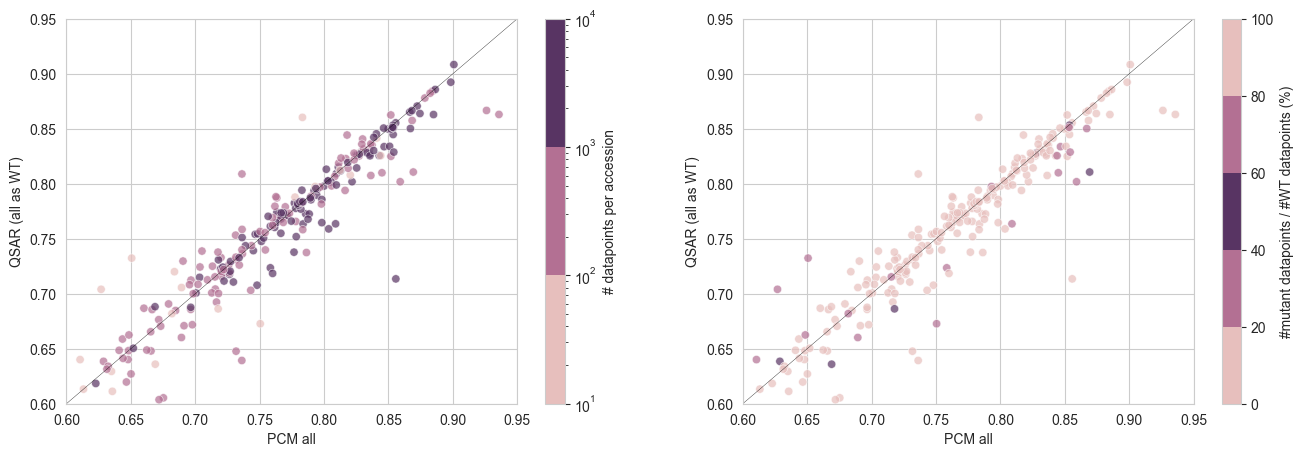

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARallWT.svg'))

In [12]:
save_plots

True

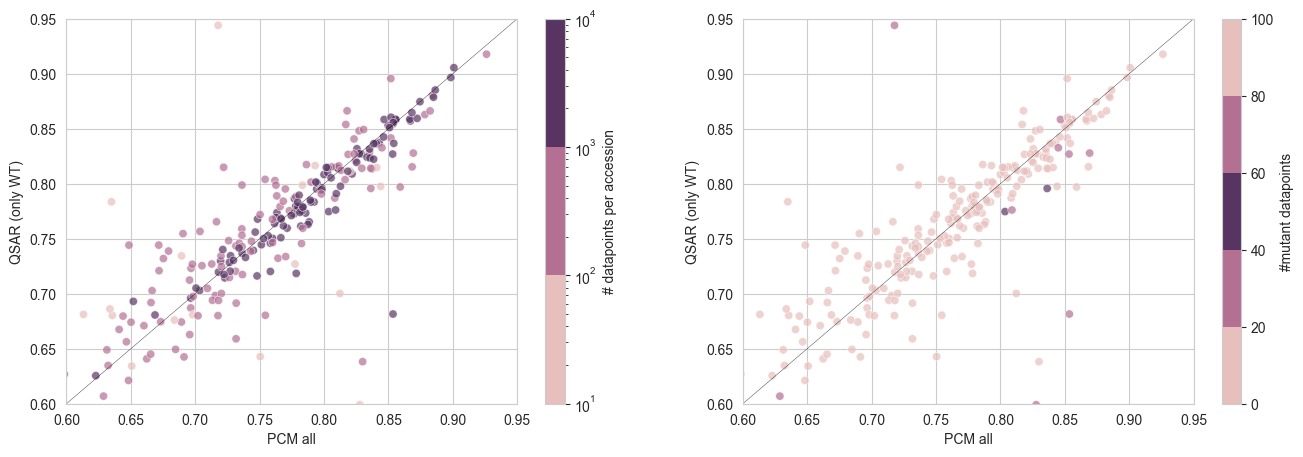

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARonlyWT.svg'))

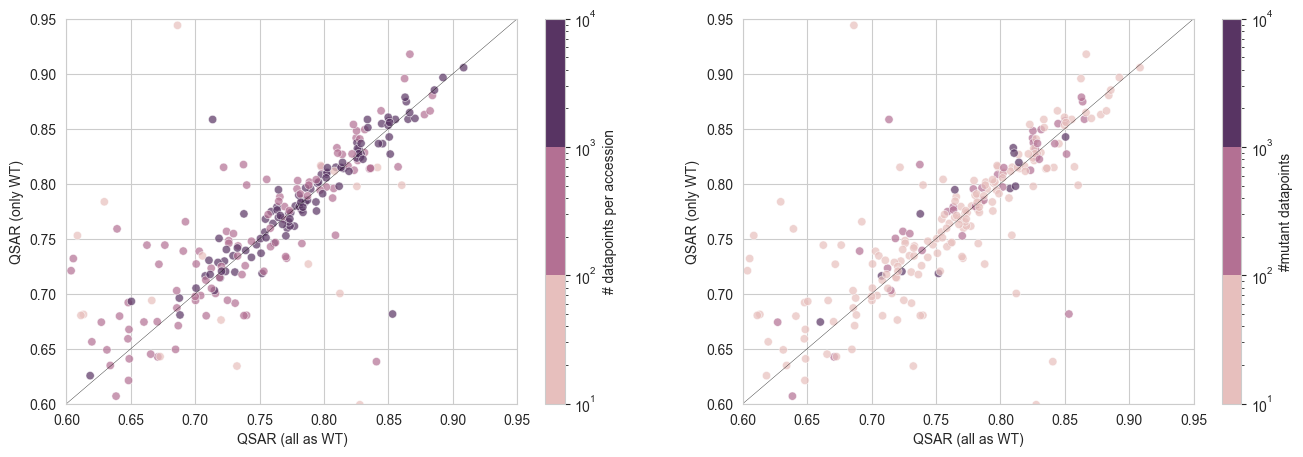

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_mutants',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARonlyWT.svg'))

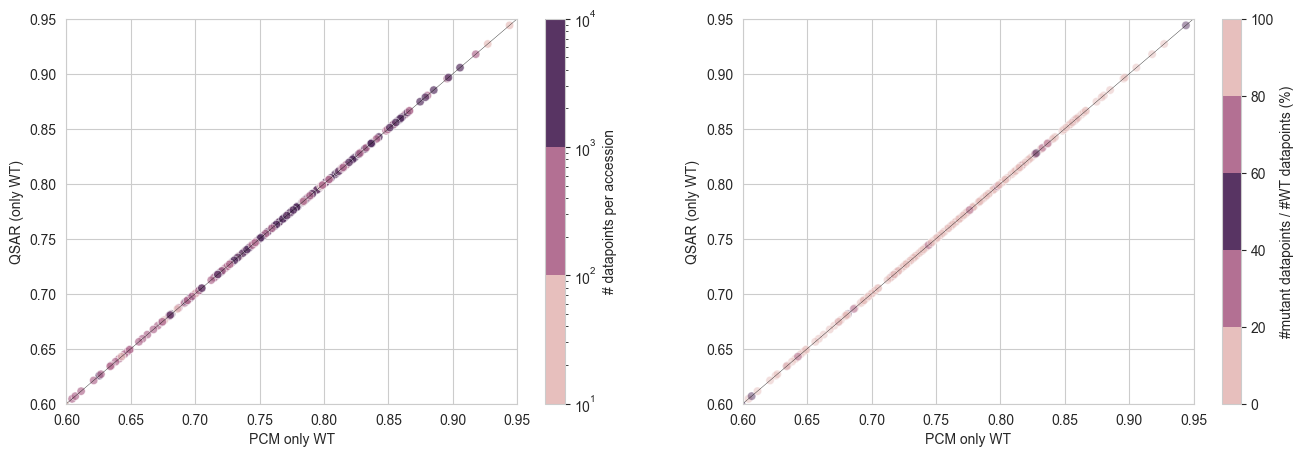

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_False_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_False_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.5,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM only WT', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM only WT', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMonlyWT_vs_QSARonlyWT.svg'))

Since the data contains only WT, adding protein descriptors does not confer PCM with any advantage over QSAR modelling. 

## Common subsets

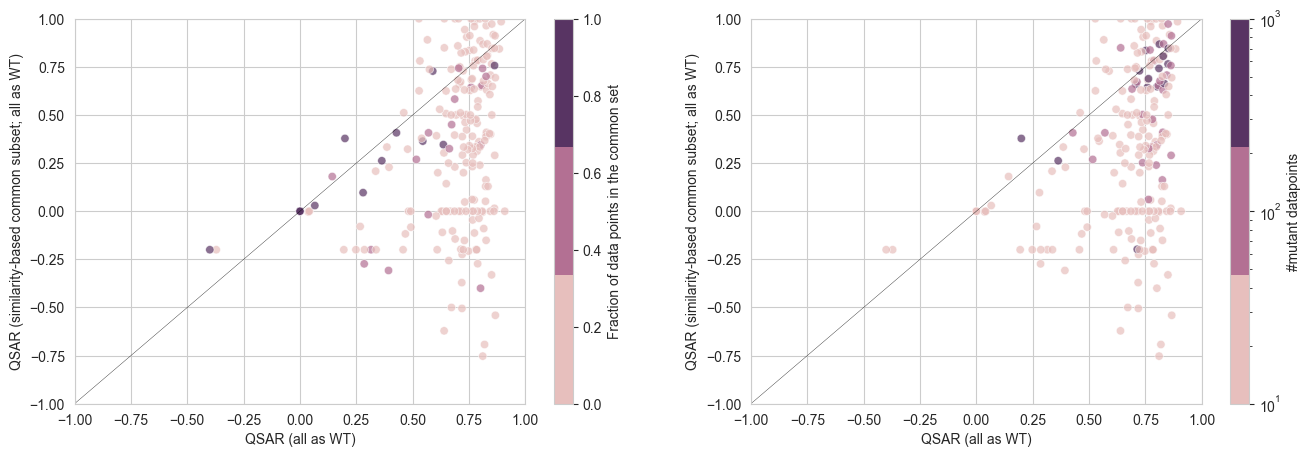

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total_common.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total_common.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='num_datapoints_mutants_common',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_mutants_common.max())), clip=True),
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_mutants_common.max())), clip=True)
# norm2 = plt.Normalize(mean_scatter_data)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset; all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset; all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARsim.svg'))

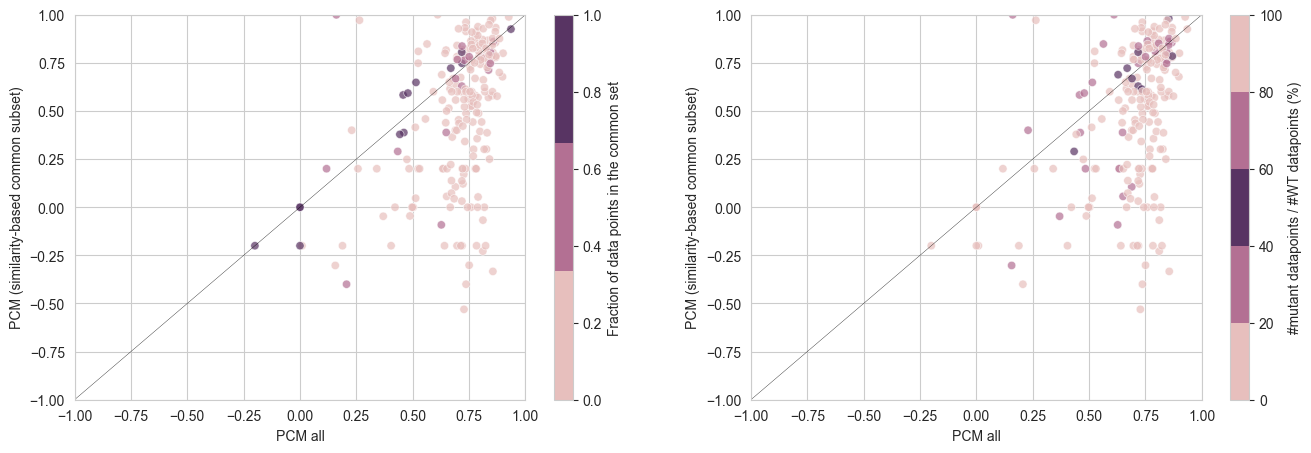

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_PCMsim.svg'))

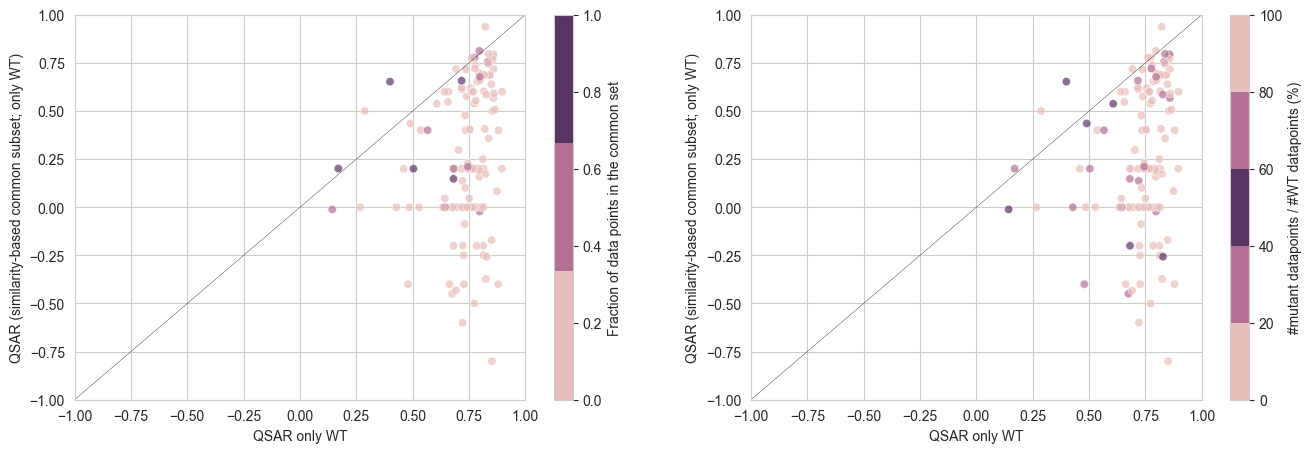

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_False_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_False_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='QSAR only WT', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR only WT', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARonlyWTsim_vs_QSARonlyWT.svg'))

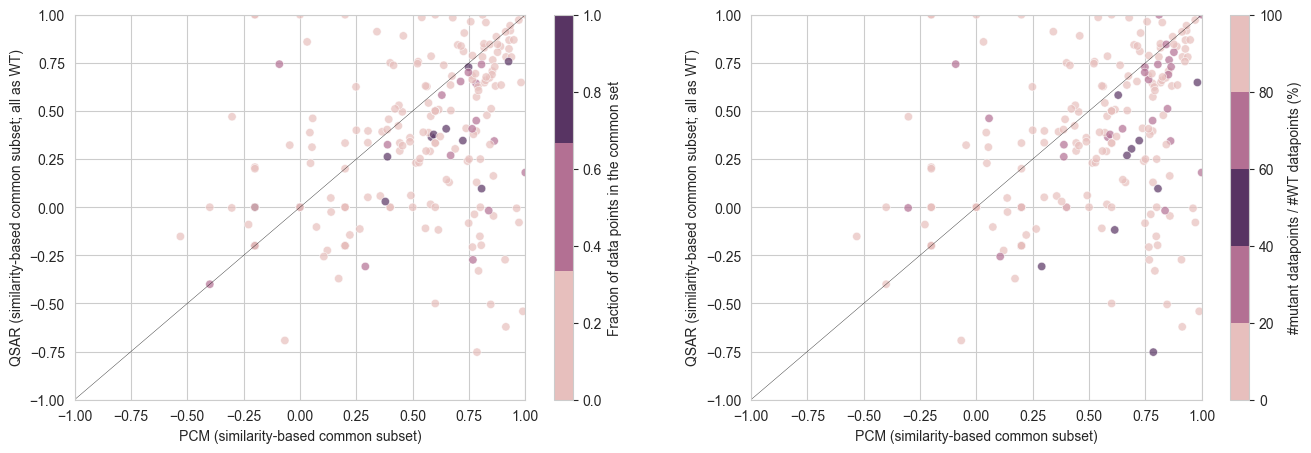

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset; all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset; all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMsim_vs_QSARsim.svg'))

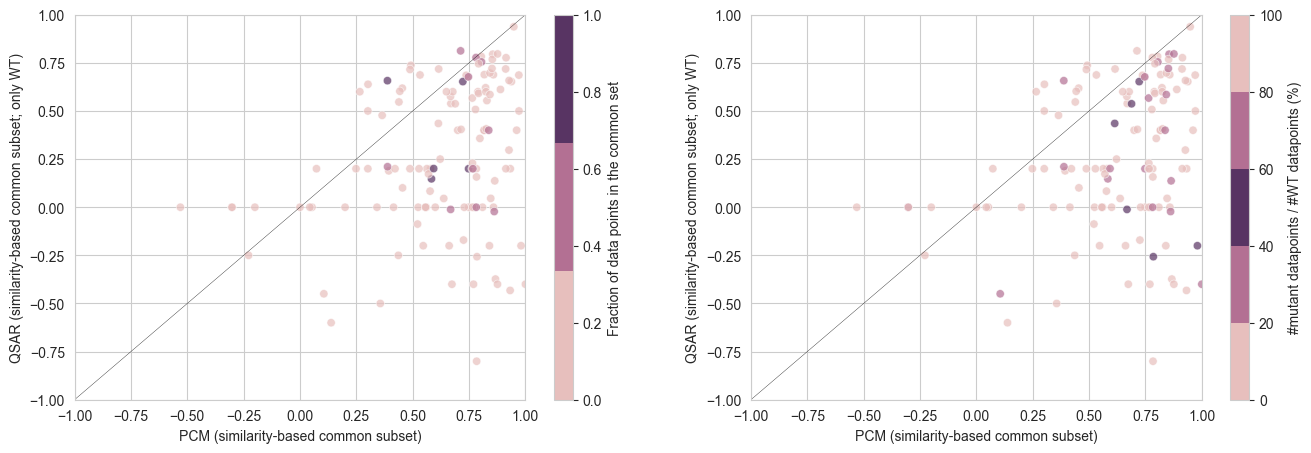

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMsim_vs_QSARsim.svg'))

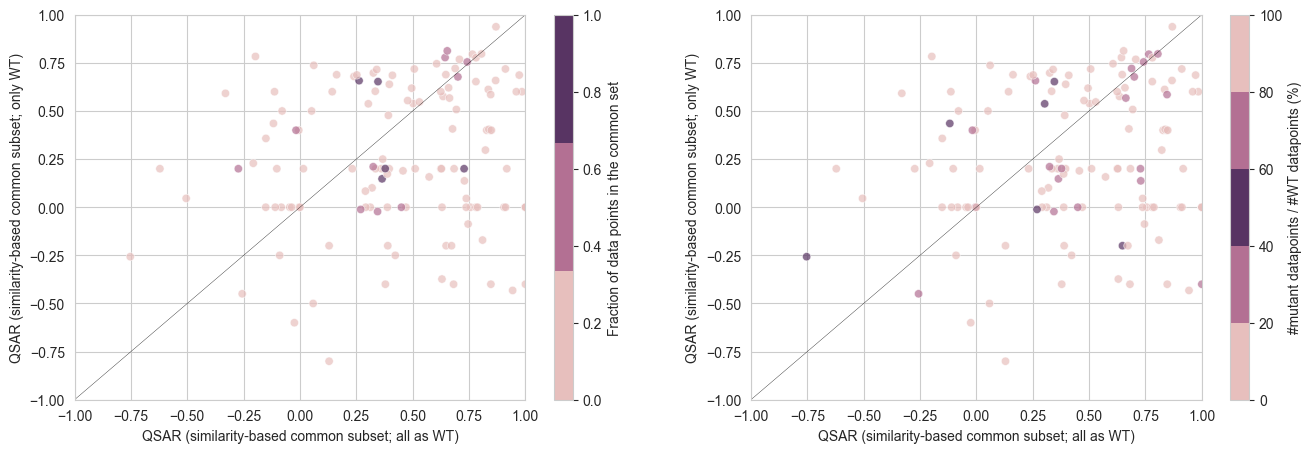

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_common_True_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_common_True_random',
                      y='Pearson_r_QSAR_common_False_random',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='QSAR (similarity-based common subset; all as WT)', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR (similarity-based common subset; all as WT)', ylabel='QSAR (similarity-based common subset; only WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallasWTsim_vs_QSARonlyWTsim.svg'))

## LOVO cross-validation

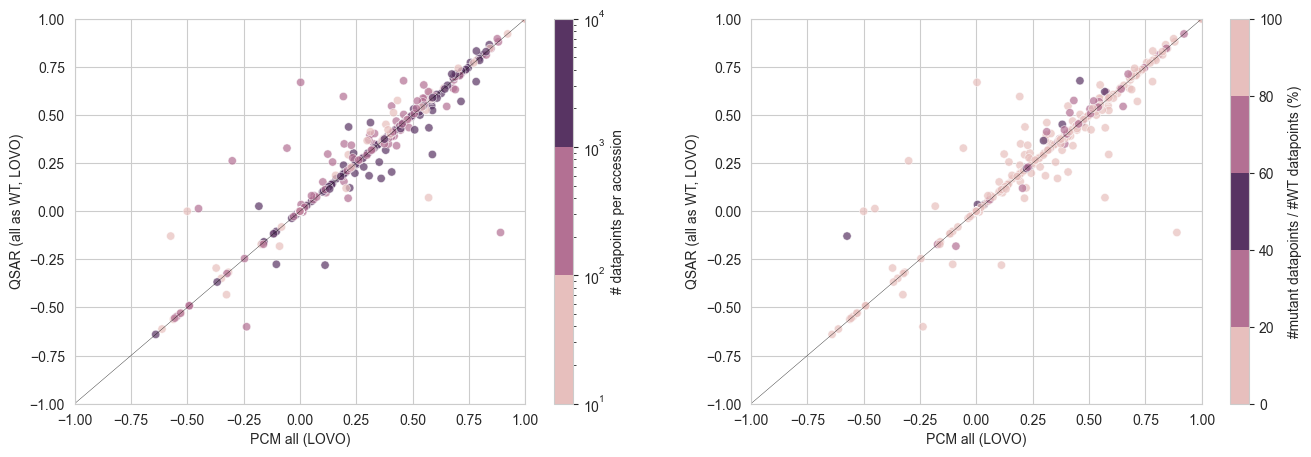

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM all (LOVO)', ylabel='QSAR (all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM all (LOVO)', ylabel='QSAR (all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARallWT_LOVO.svg'))

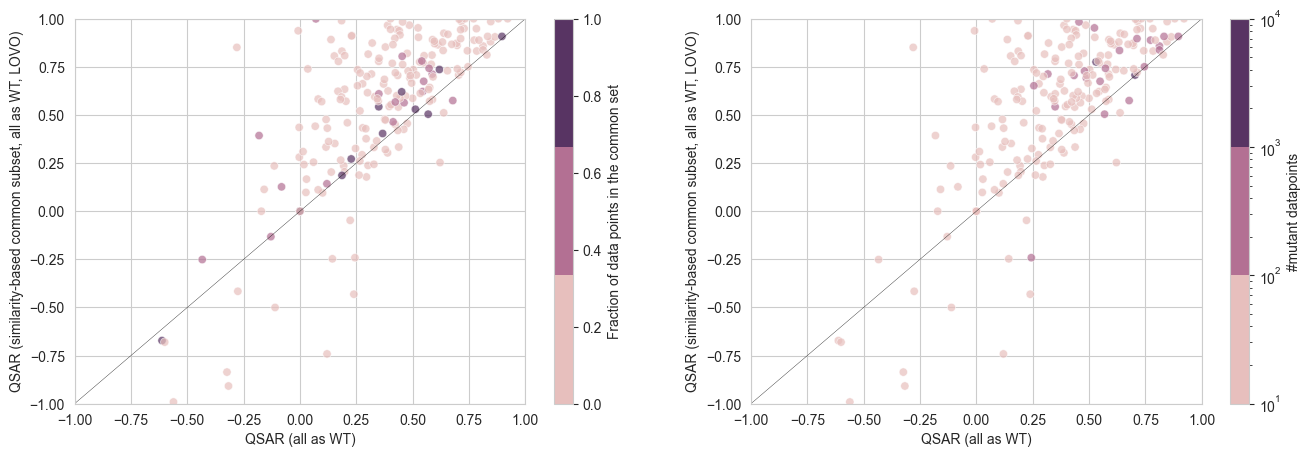

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='num_datapoints_mutants_common',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      data=mean_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARsim_LOVO.svg'))

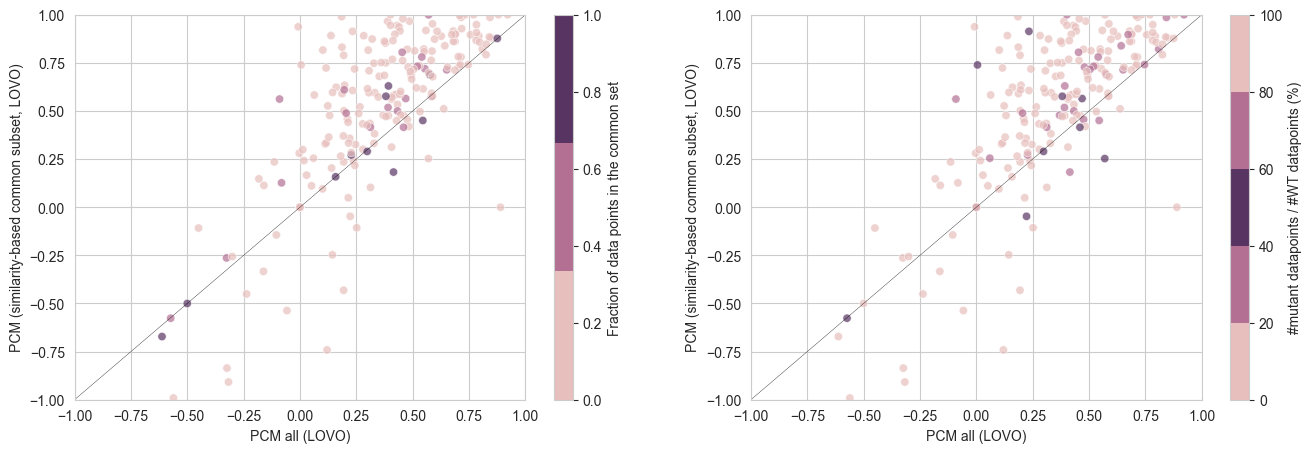

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='common_fraction_of_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      # hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
# norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
norm1 = plt.Normalize(0, mean_scatter_data.common_fraction_of_total.max())
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Fraction of data points in the common set')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM all (LOVO)', ylabel='PCM (similarity-based common subset, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM all (LOVO)', ylabel='PCM (similarity-based common subset, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_PCMsim_LOVO.svg'))

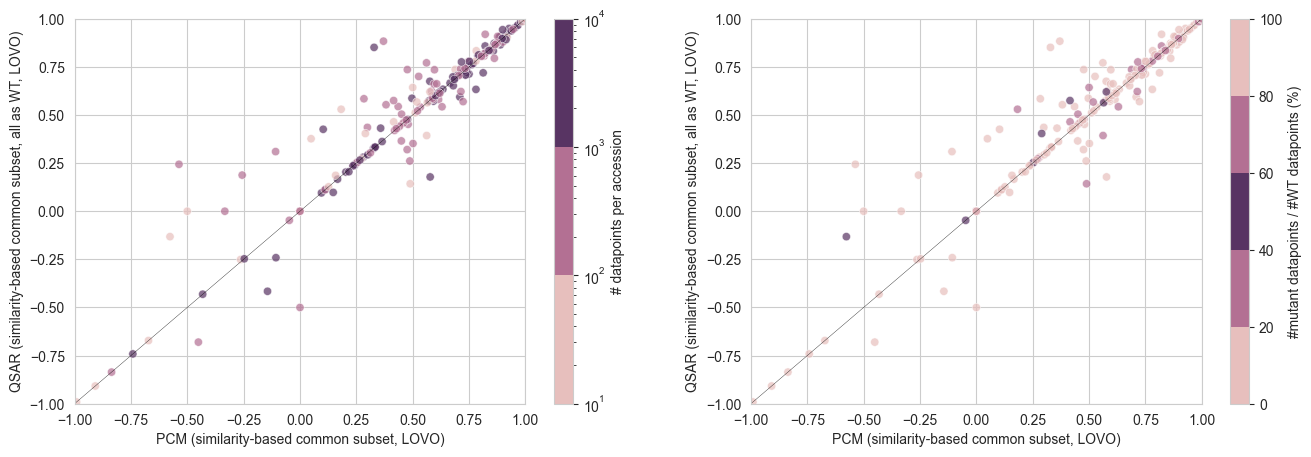

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='num_datapoints_total',
                      data=mean_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(mean_scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=mean_scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (similarity-based common subset, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (similarity-based common subset, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMsim_vs_QSARsim_LOVO.svg'))

## Protein families

In [26]:
from papyrus_scripts import read_protein_set
from papyrus_scripts.preprocess import equalize_cell_size_in_column

In [27]:
proteins = read_protein_set()

In [28]:
proteins = proteins[proteins.target_id.str.endswith('_WT')].reset_index(drop=True)
proteins['accession'] = proteins.target_id.str.split('_').str[0]

In [29]:
proteins = pd.concat([proteins,
                      pd.DataFrame(equalize_cell_size_in_column(proteins.Classification.str.split('->')).tolist(), columns=[f'L{i}' for i in range(1, 7)])
                      ],
                     axis=1)

In [30]:
annotation = pd.Series([''] * proteins.shape[0])
annotation.loc[proteins.L1 == 'Ion channel'] = 'Ion Channel'
annotation.loc[proteins.L2 == 'Nuclear receptor'] = 'Nuclear Receptor'
annotation.loc[proteins.L2 == 'Family A G protein-coupled receptor'] = 'Family A GPCR'
annotation.loc[proteins.L3 == 'Protein Kinase'] = 'Protein Kinase'
proteins['color'] = annotation

In [31]:
mean_scatter_data = mean_scatter_data.merge(proteins, on='accession')

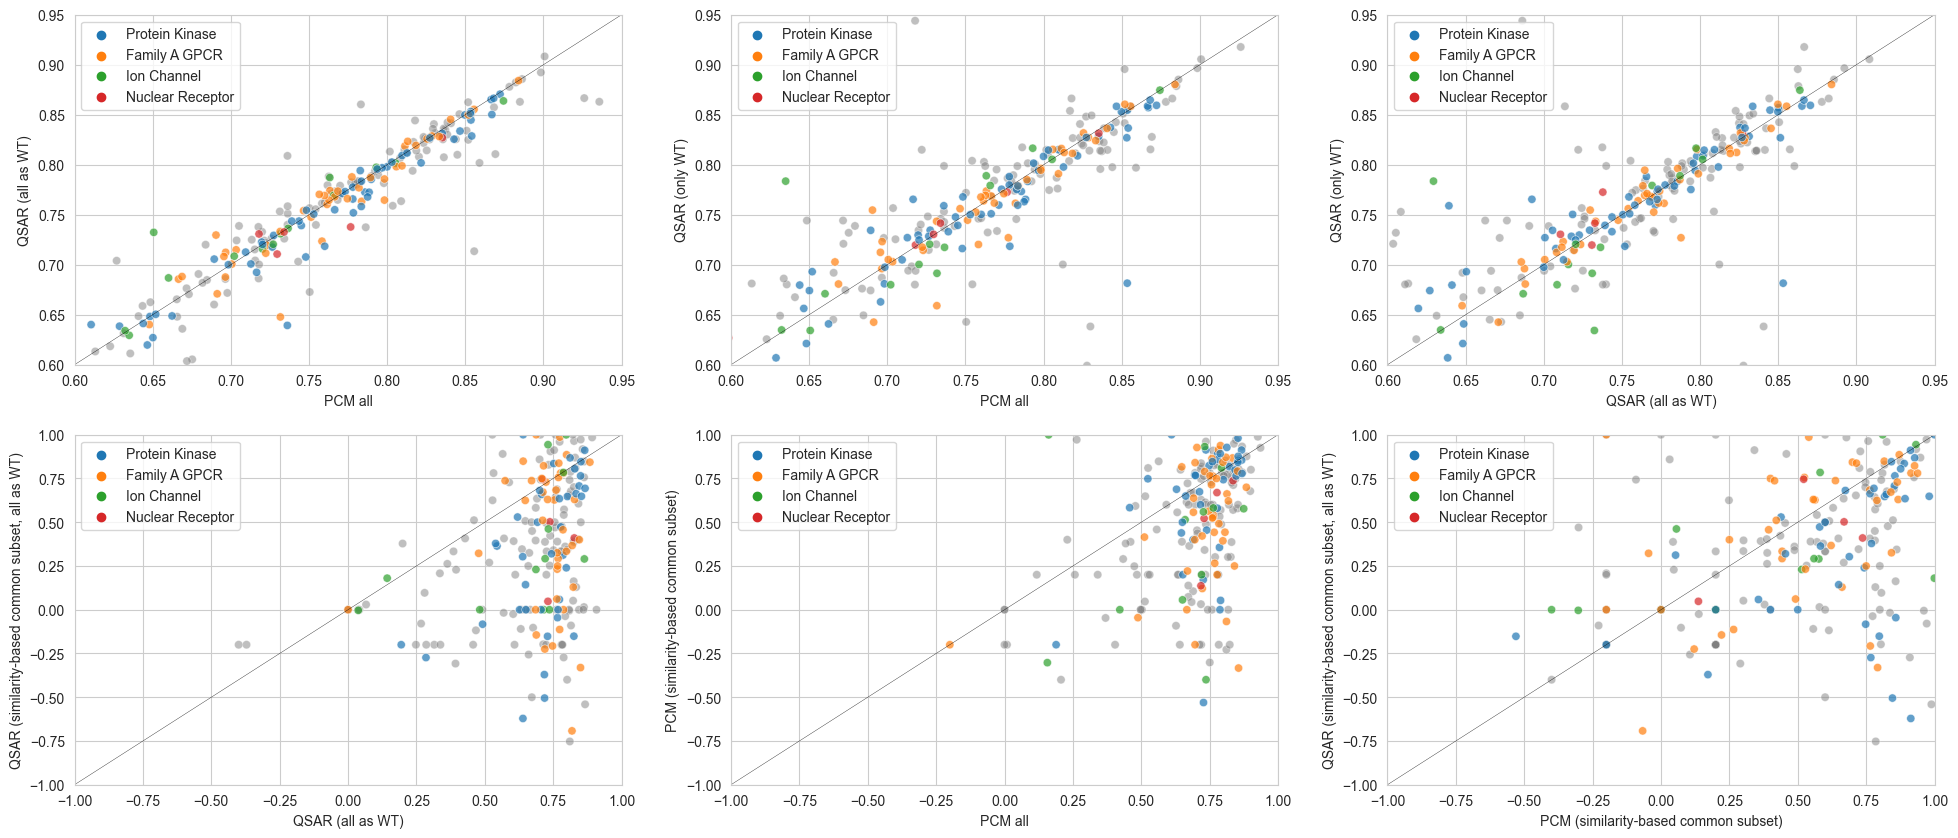

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
palette = matplotlib.colors.ListedColormap(['grey']).colors
palette2 = sns.color_palette(as_cmap=True)[:4]


for iy, ix in np.ndindex(axes.shape):
    # Plot identity lines
    axes[iy, ix].plot(np.linspace(-100, 100, 100),
                      np.linspace(-100, 100, 100),
                      linestyle='solid', linewidth=0.25,
                      color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 0])
sns.lineplot()
ax1.legend_.set_title(None)

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 2])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 2])
sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)



_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Protein_families.svg'))

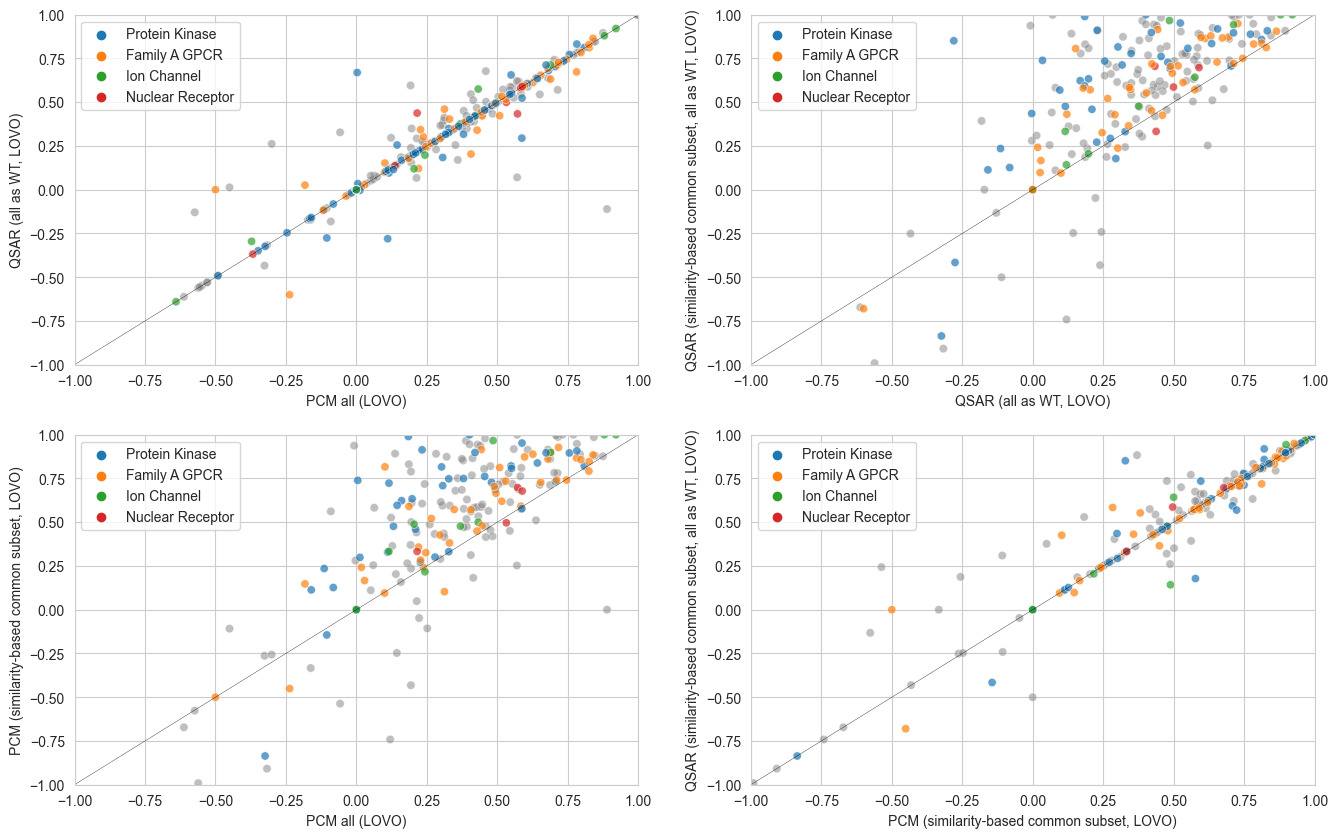

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
palette = matplotlib.colors.ListedColormap(['grey']).colors
palette2 = sns.color_palette(as_cmap=True)[:4]

# Plot identity lines
for iy, ix in np.ndindex(axes.shape):
    axes[iy, ix].plot(np.linspace(-100, 100, 100),
                      np.linspace(-100, 100, 100),
                      linestyle='solid', linewidth=0.25,
                      color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[mean_scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 0])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=mean_scatter_data[(mean_scatter_data.color != '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 1])
ax4.legend_.set_title(None)

_ = ax1.set(xlabel='PCM all (LOVO)', ylabel='QSAR (all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1))
_ = ax2.set(xlabel='QSAR (all as WT, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax3.set(xlabel='PCM all (LOVO)', ylabel='PCM (similarity-based common subset, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax4.set(xlabel='PCM (similarity-based common subset, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Protein_families_LOVO.svg'))

## Interesting targets

In [113]:
mean_scatter_data.loc[(mean_scatter_data.num_datapoints_total > 1_000) & (mean_scatter_data.datapoints_mutant_percentage > 10), 'interesting_color'] = 'Interesting'
mean_scatter_data.loc[~((mean_scatter_data.num_datapoints_total > 1_000) & (mean_scatter_data.datapoints_mutant_percentage > 10)), 'interesting_color'] = ''

In [114]:
palette_interesting = sns.color_palette(as_cmap=True)[3:4]
palette = matplotlib.colors.ListedColormap(['grey']).colors

In [115]:
def repel_labels(ax, x, y, labels, k=0.01):
    import networkx as nx
    G = nx.DiGraph()
    data_nodes = []
    init_pos = {}
    for xi, yi, label in zip(x, y, labels):
        data_str = 'data_{0}'.format(label)
        G.add_node(data_str)
        G.add_node(label)
        G.add_edge(label, data_str)
        data_nodes.append(data_str)
        init_pos[data_str] = (xi, yi)
        init_pos[label] = (xi, yi)

    pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k)

    # undo spring_layout's rescaling
    pos_after = np.vstack([pos[d] for d in data_nodes])
    pos_before = np.vstack([init_pos[d] for d in data_nodes])
    scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
    scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
    shift = np.array([shift_x, shift_y])
    for key, val in pos.items():
        pos[key] = (val*scale) + shift

    for label, data_str in G.edges():
        ax.annotate(label,
                    xy=pos[data_str], xycoords='data',
                    xytext=pos[label], textcoords='data',
                    # arrowprops=dict(arrowstyle="-",
                    #                 shrinkA=0, shrinkB=0,
                    #                 connectionstyle="arc3", 
                    #                 color='black'), 
                    )
    # expand limits
    # all_pos = np.vstack(list(pos.values()))
    # x_span, y_span = np.ptp(all_pos, axis=0)
    # mins = np.min(all_pos-x_span*0.15, 0)
    # maxs = np.max(all_pos+y_span*0.15, 0)
    # ax.set_xlim([mins[0], maxs[0]])
    # ax.set_ylim([mins[1], maxs[1]])

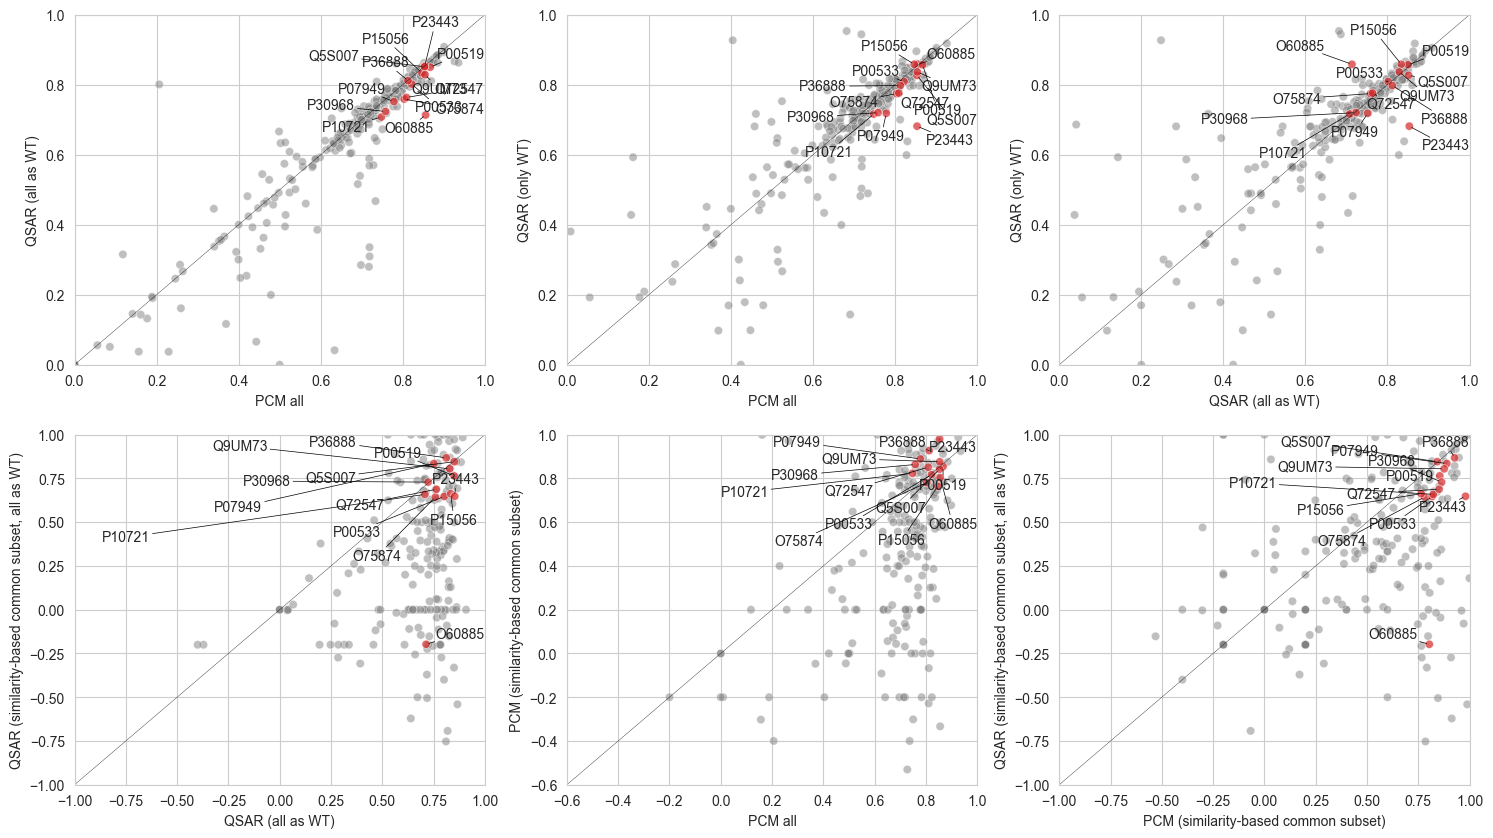

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='interesting_color',
                      data=mean_scatter_data[mean_scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_QSAR_complete_True_random',
                hue='interesting_color',
                data=mean_scatter_data[mean_scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='interesting_color',
                      data=mean_scatter_data[mean_scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_QSAR_complete_False_random',
                hue='interesting_color',
                data=mean_scatter_data[mean_scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='interesting_color',
                      data=mean_scatter_data[mean_scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 2])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                y='Pearson_r_QSAR_complete_False_random',
                hue='interesting_color',
                data=mean_scatter_data[mean_scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 2])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                y='Pearson_r_QSAR_common_True_random',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 0])
ax4.legend_.set_title(None)

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_PCM_common_True_random',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 1])
ax5.legend_.set_title(None)

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 2])
sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                y='Pearson_r_QSAR_common_True_random',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 2])
ax6.legend_.set_title(None)

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-0.6, 1), ylim=(-0.6, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )

ax1_texts = [ax1.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax1_empty = [ax1.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax1_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # add_objects=ax1_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                # only_move={'text': 'y', 'explode': 'xy', 'static': 'x', 'pull': 'x'},
                # expand_text=(2.5, 2.5),
                ax=ax1)
ax2_texts = [ax2.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax2_empty = [ax2.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_False_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax2_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax2_empty,
                expand_points=(1.5, 1.5),
                expand_text=(1.1, 1.1),
                ax=ax2)
ax3_texts = [ax3.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax3_empty = [ax3.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_False_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax3_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax3_empty,
                expand_points=(1.5, 1.5),
                expand_text=(1.5, 1.5),
                ax=ax3)
ax4_texts = [ax4.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_QSAR_complete_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '')  & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_QSAR_common_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].accession.tolist())]
_ = adjust_text(texts=ax4_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                expand_text=(1.2, 1.2),
                force_text=(1.25, 1.5),
                ax=ax4)
ax5_texts = [ax5.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_PCM_complete_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_PCM_common_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].accession.tolist())]
# ax5_empty = [ax5.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_common_True_random.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
# 
_ = adjust_text(texts=ax5_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                # add_objects=ax5_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # expand_points=(1.5, 1.5),
                # expand_text=(2, 2),
                # force_text=(.75, .75),
                # force_points=(1.25, 1.5),
            #     force_points=0.2, force_text=0.2,
            # expand_points=(1, 1), expand_text=(1, 1),
                ax=ax5)

xs, ys, labels = zip(*[(x, y, accession) for x, y, accession in zip(mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_PCM_complete_True_random.tolist(),
                                                                    mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_PCM_common_True_random.tolist(),
                                                                    mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].accession.tolist())])
# repel_labels(ax5, xs, ys, labels, k=0.01)

ax6_texts = [ax6.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_PCM_common_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].Pearson_r_QSAR_common_True_random.tolist(),
                                        mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)].accession.tolist())]
_ = adjust_text(texts=ax6_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                # expand_text=(1.2, 1.2),
                ax=ax6)

_ = ax1.legend([],[], frameon=False)
_ = ax2.legend([],[], frameon=False)
_ = ax3.legend([],[], frameon=False)
_ = ax4.legend([],[], frameon=False)
_ = ax5.legend([],[], frameon=False)
_ = ax6.legend([],[], frameon=False)

if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Interesting_proteins.svg'))

In [38]:
mean_scatter_data[['Pearson_r_QSAR_complete_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant', 'interesting_color']]

Pearson_r_QSAR_complete_True_per_mutant  \
0                                   0.546368   
1                                   0.000000   
2                                   0.390531   
3                                   0.845408   
4                                  -0.317109   
..                                       ...   
321                                -0.245944   
322                                 0.316678   
323                                 0.000000   
324                                 0.533539   
325                                 0.170306   

     Pearson_r_QSAR_common_True_per_mutant interesting_color  
0                                 0.770919                    
1                                 0.000000                    
2                                 0.625016                    
3                                 0.880659                    
4                                -0.907991                    
..                                     ...               ...  
321                                    NaN                    
322                                    NaN                    
323                               0.000000                    
324                               0.612698                    
325                               0.778368                    

[326 rows x 3 columns]

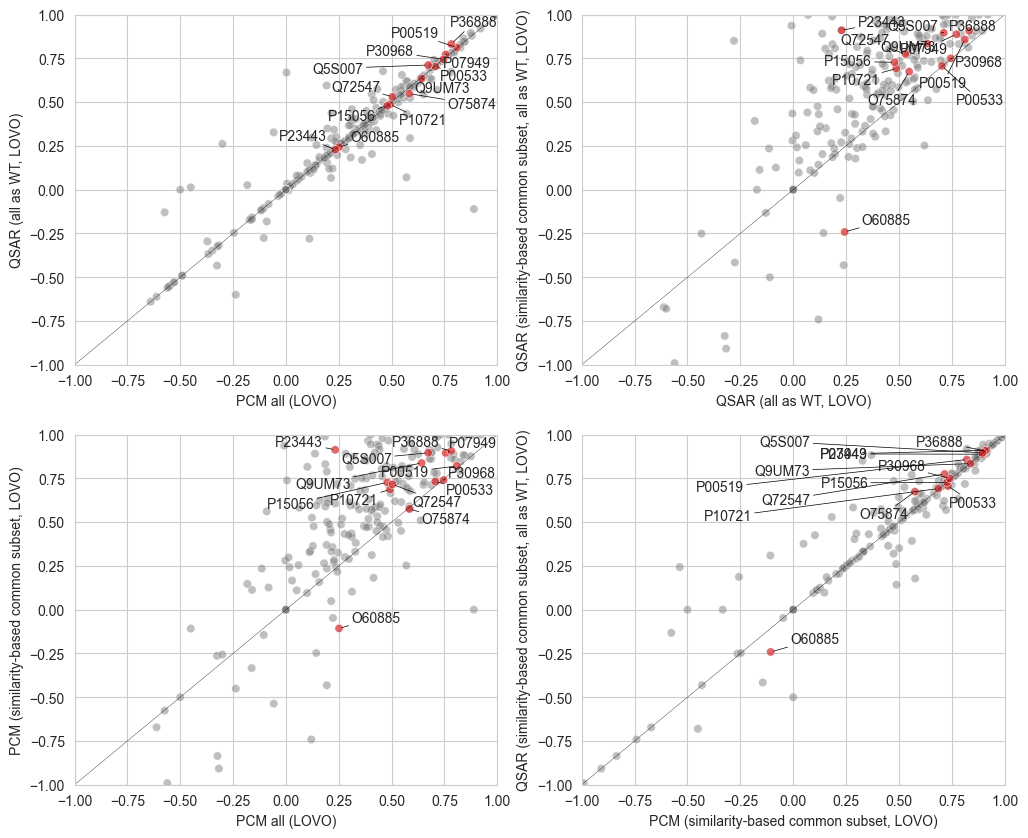

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='interesting_color',
                      data=mean_scatter_data[mean_scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                y='Pearson_r_QSAR_complete_True_per_mutant',
                hue='interesting_color',
                data=mean_scatter_data[mean_scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                y='Pearson_r_QSAR_common_True_per_mutant',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                y='Pearson_r_PCM_common_True_per_mutant',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 0])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='interesting_color',
                      data=mean_scatter_data[(mean_scatter_data.interesting_color == '') & (mean_scatter_data.num_datapoints_total_common != 0)], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                y='Pearson_r_QSAR_common_True_per_mutant',
                hue='interesting_color',
                data=mean_scatter_data[(mean_scatter_data.interesting_color != '') & (mean_scatter_data.num_datapoints_total_common != 0)],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 1])
ax4.legend_.set_title(None)


_ = ax1.set(xlabel='PCM all (LOVO)', ylabel='QSAR (all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1))
_ = ax2.set(xlabel='QSAR (all as WT, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax3.set(xlabel='PCM all (LOVO)', ylabel='PCM (similarity-based common subset, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax4.set(xlabel='PCM (similarity-based common subset, LOVO)', ylabel='QSAR (similarity-based common subset, all as WT, LOVO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )

ax1_texts = [ax1.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax1_empty = [ax1.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax1_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                # add_objects=ax1_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                #expand_points=(2.4, 2.4),
                expand_points=(1.5, 1.5),
                # expand_text=(1.5, 1.5),
                ax=ax1)
ax2_texts = [ax2.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax2_empty = [ax2.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax2_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax2_empty,
                expand_points=(1.7, 1.7),
                # expand_text=(1.5, 1.5),
                ax=ax2)
ax3_texts = [ax3.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
# ax3_empty = [ax3.text(x, y, s=' ')
#              for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
#                                         mean_scatter_data[mean_scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax3_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax3_empty,
                expand_points=(1.5, 1.5),
                #expand_points=(2.2, 2.2),
                # expand_text=(1.5, 1.5),
                ax=ax3)
ax4_texts = [ax4.text(x, y, s=accession)
             for x, y, accession in zip(mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                                        mean_scatter_data[mean_scatter_data.interesting_color != ''].accession.tolist())]
_ = adjust_text(texts=ax4_texts,
                # x=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                # y=mean_scatter_data[mean_scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # expand_points=(2., 2.),
                expand_points=(1.8, 1.8),
                expand_text=(1.2, 1.2),
                ax=ax4)

ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)

if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Interesting_proteins_LOVO.svg'))

In [40]:
mean_scatter_data[mean_scatter_data.interesting_color != ''][['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant', 'accession']]

Pearson_r_PCM_common_True_per_mutant  \
25                              -0.106666   
27                               0.576024   
37                               0.821393   
40                               0.732436   
69                               0.895865   
87                               0.686749   
104                              0.728069   
128                              0.913674   
150                              0.740890   
171                              0.907602   
267                              0.896680   
271                              0.716344   
320                              0.838538   

     Pearson_r_QSAR_common_True_per_mutant accession  
25                               -0.241381    O60885  
27                                0.674911    O75874  
37                                0.858331    P00519  
40                                0.707337    P00533  
69                                0.888695    P07949  
87                                0.692262    P10721  
104                               0.728069    P15056  
128                               0.910850    P23443  
150                               0.750443    P30968  
171                               0.908089    P36888  
267                               0.896680    Q5S007  
271                               0.775609    Q72547  
320                               0.835105    Q9UM73

## Differences in bioactivity

In [41]:
# TODO: change path of stats to generic, as they are created in main.py

In [42]:
stats = pd.read_csv('C:/Users/ojbeq/Downloads/stats_file_All.txt', sep='\t')
stats_var = pd.read_csv('C:/Users/ojbeq/Downloads/stats_per_variant_round2.txt', sep='\t')

Obtain color scales of he next plots:
- `avg_WT`: the average pchembl value of WT proteins only
- `weighted_avg_all`: the weighted average of pchembl value (weighted by number of datapoints for each variant)
- `abs_weighted_diff`: the absolute difference between the weighted average of the mutants pchembl values and the average pchembl values of the corresponding WT accession
- `abs_diff`: the absolute difference betwen the **un**weighted average of the mutants pchembl values and the average pchembl values of the corresponding WT accession
- `max_abs_diff`: the maximum absolute difference between the average pchembl value of mutants and the average of the pchembl of their corresponding WT accession

In [43]:
# Obtain the average pchembl of the WT proteins only
avg_WT = stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')

In [44]:
# Obtain weighted mean of all variants (including WT)
stats_datapoints = pd.concat([stats_var[['accession', 'variant', 'connectivity_variant_percentage']].set_index('variant'),
                              stats[['target_id', 'mean_pchembl']].set_index('target_id'),
                              ],
                             axis=1)
# Define a lambda function to compute the weighted mean:
weighted_mean = lambda x: np.average(x, weights=stats_datapoints.loc[x.index, "connectivity_variant_percentage"])

# Group by accession and calculate weighted average of pchembl value
weighted_avg_all = stats_datapoints.groupby(["accession"]).agg(pchembl_weighted_mean=("mean_pchembl", weighted_mean))

In [45]:
# Obtain weighted of mutants only (no WT)
mutant_datapoints = pd.concat([stats_var[~stats_var.variant.str.endswith('_WT')][['accession', 'variant', 'connectivity_variant_percentage']].set_index('variant'),
                               stats[~stats.target_id.str.endswith('_WT')][['target_id', 'mean_pchembl']].set_index('target_id'),
                               ],
                              axis=1)
# Define a lambda function to compute the weighted mean:
weighted_mean_var = lambda x: np.average(x, weights=mutant_datapoints.loc[x.index, "connectivity_variant_percentage"])

# Group by accession and calculate weighted average of pchembl value
weighted_pchembl_var = mutant_datapoints.groupby(["accession"]).agg(pchembl_weighted_mean=("mean_pchembl", weighted_mean_var))

# Obtain deviation to WT
abs_weighted_diff = (pd.concat([weighted_pchembl_var,
                                        stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')],
                                       axis=1).dropna()
                             .diff(axis=1)
                             .iloc[:, 1:]
                             .abs()
                             .rename(columns={'mean_pchembl': 'abs_weighted_diff_pchembl_mutant-WT'})
                             )

In [46]:
# Obtain deviation to WT (first group by accession and calculate average of pchembl value)
abs_diff = (pd.concat([mutant_datapoints.groupby(["accession"]).agg(pchembl_mean=("mean_pchembl", "mean")),
                                        stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')],
                                       axis=1).dropna()
                             .diff(axis=1)
                             .iloc[:, 1:]
                             .abs()
                             .rename(columns={'mean_pchembl': 'abs_diff_pchembl_mutant-WT'})
                             )

In [47]:
# Obtain the maximum deviation to WT (no grouping by accession)
max_abs_diff = (stats[~stats.target_id.str.endswith('_WT')][['accession', 'target_id', 'mean_pchembl']]
                .rename(columns={'mean_pchembl': 'mean_pchembl_mutant'})
                .merge(stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']]
                        .rename(columns={'mean_pchembl': 'mean_pchembl_WT'}),
                       on='accession')
                )
max_abs_diff['max_abs_diff_pchembl_mutant-WT'] = (max_abs_diff.mean_pchembl_mutant - max_abs_diff.mean_pchembl_WT).abs()
max_abs_diff = (max_abs_diff.drop(columns=['mean_pchembl_mutant', 'mean_pchembl_WT'])
                .groupby('accession')
                .agg({'max_abs_diff_pchembl_mutant-WT': 'max'})
                )

In [48]:
annotations = pd.concat([avg_WT,
                         weighted_avg_all,
                         abs_weighted_diff,
                         abs_diff,
                         max_abs_diff],
                        axis=1)

In [49]:
annotated_scatter_data = mean_scatter_data.merge(annotations, on='accession')

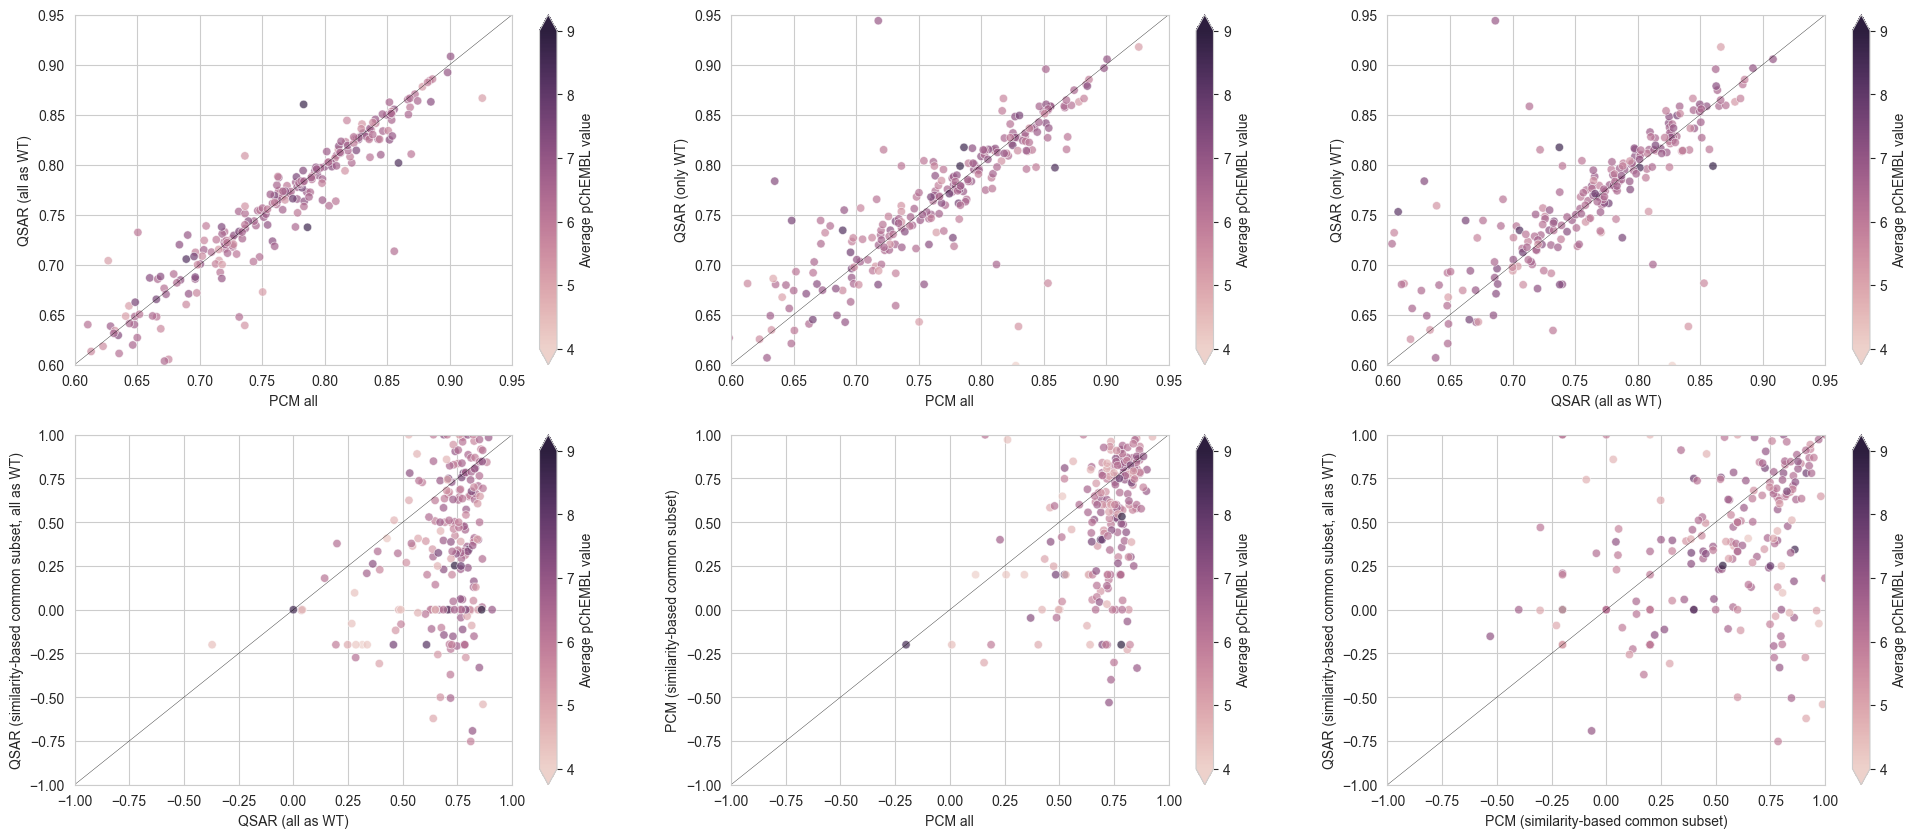

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')
 
ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.Normalize(4, 9)
sm1 = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True),
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Average pChEMBL value', extend='both')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='Average pChEMBL value', extend='both')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='Average pChEMBL value', extend='both')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='Average pChEMBL value', extend='both')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='Average pChEMBL value', extend='both')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='Average pChEMBL value', extend='both')

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Average_pChEMBL_value.svg'))

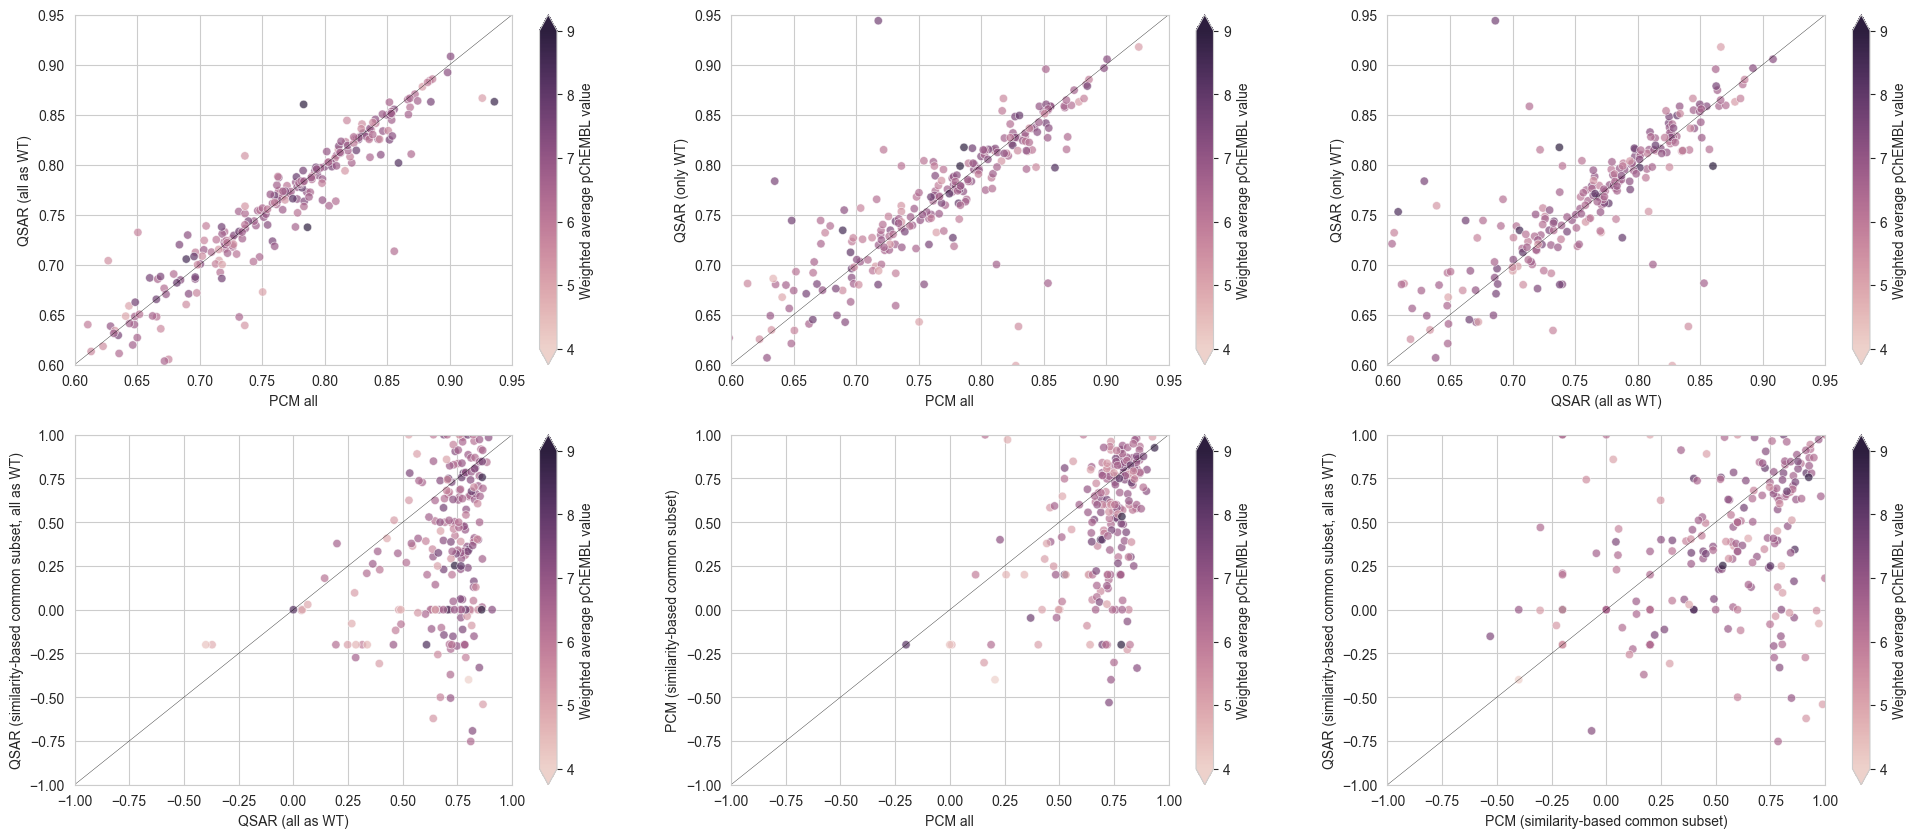

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.Normalize(4, 9)
sm1 = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True),
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Weighted average pChEMBL value', extend='both')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='Weighted average pChEMBL value', extend='both')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='Weighted average pChEMBL value', extend='both')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='Weighted average pChEMBL value', extend='both')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='Weighted average pChEMBL value', extend='both')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='Weighted average pChEMBL value', extend='both')

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Weighted_average_pChEMBL_value.svg'))

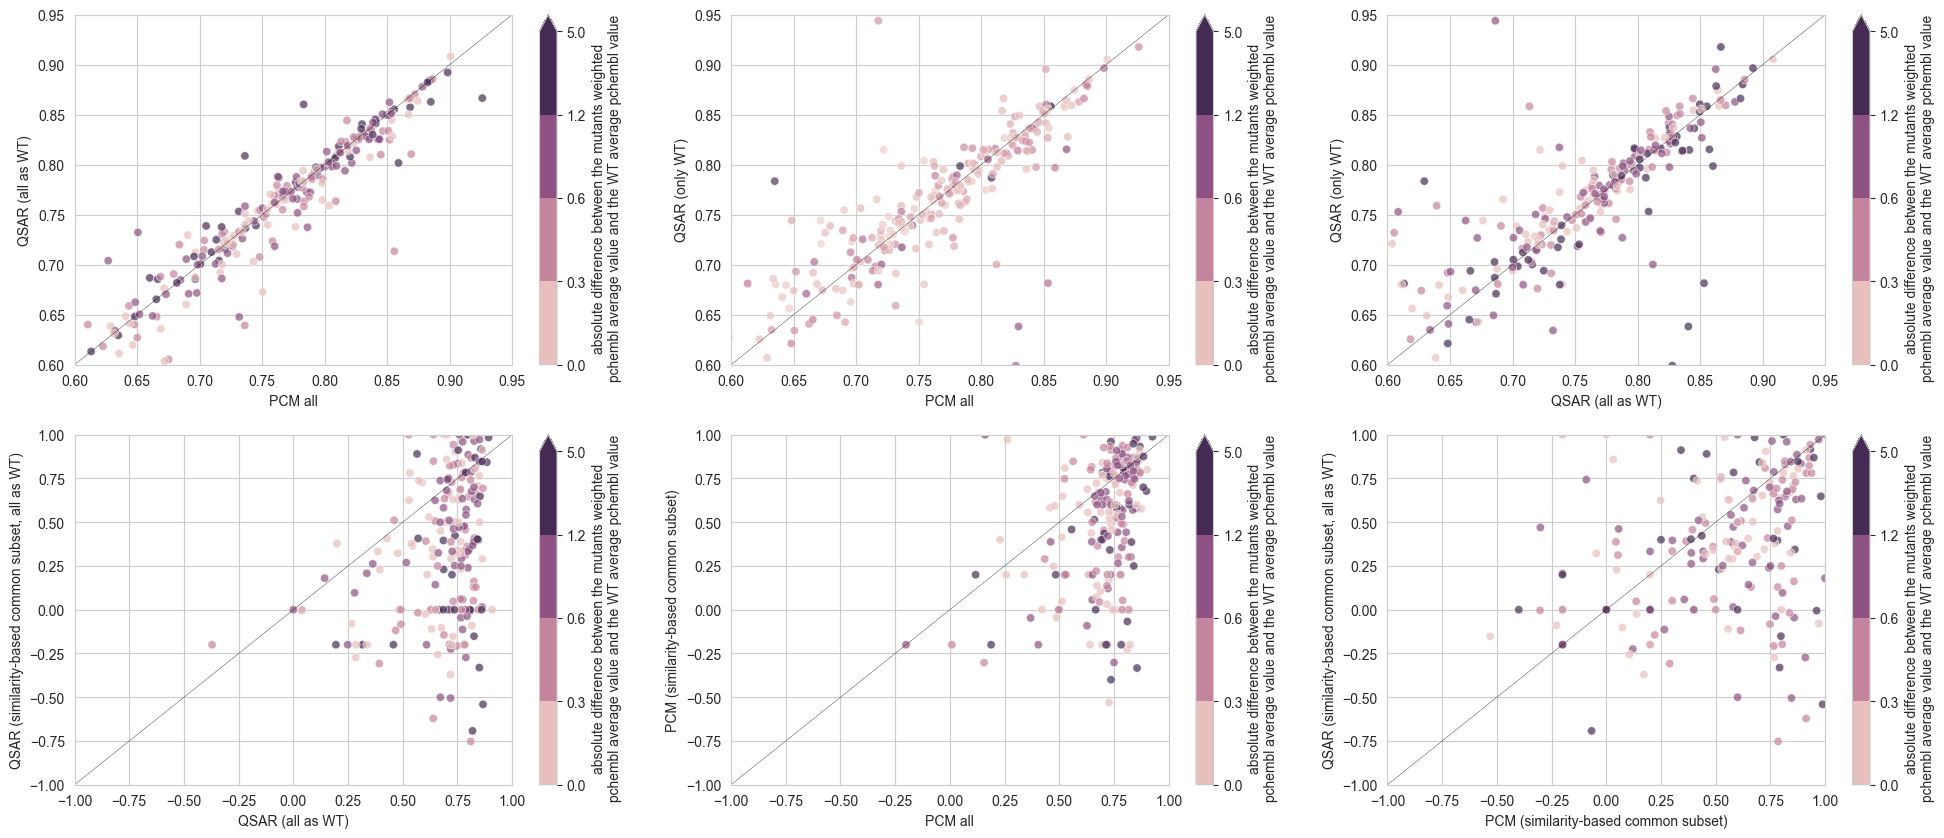

In [52]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Abs_difference_weighted_average_pChEMBL_value.svg'))

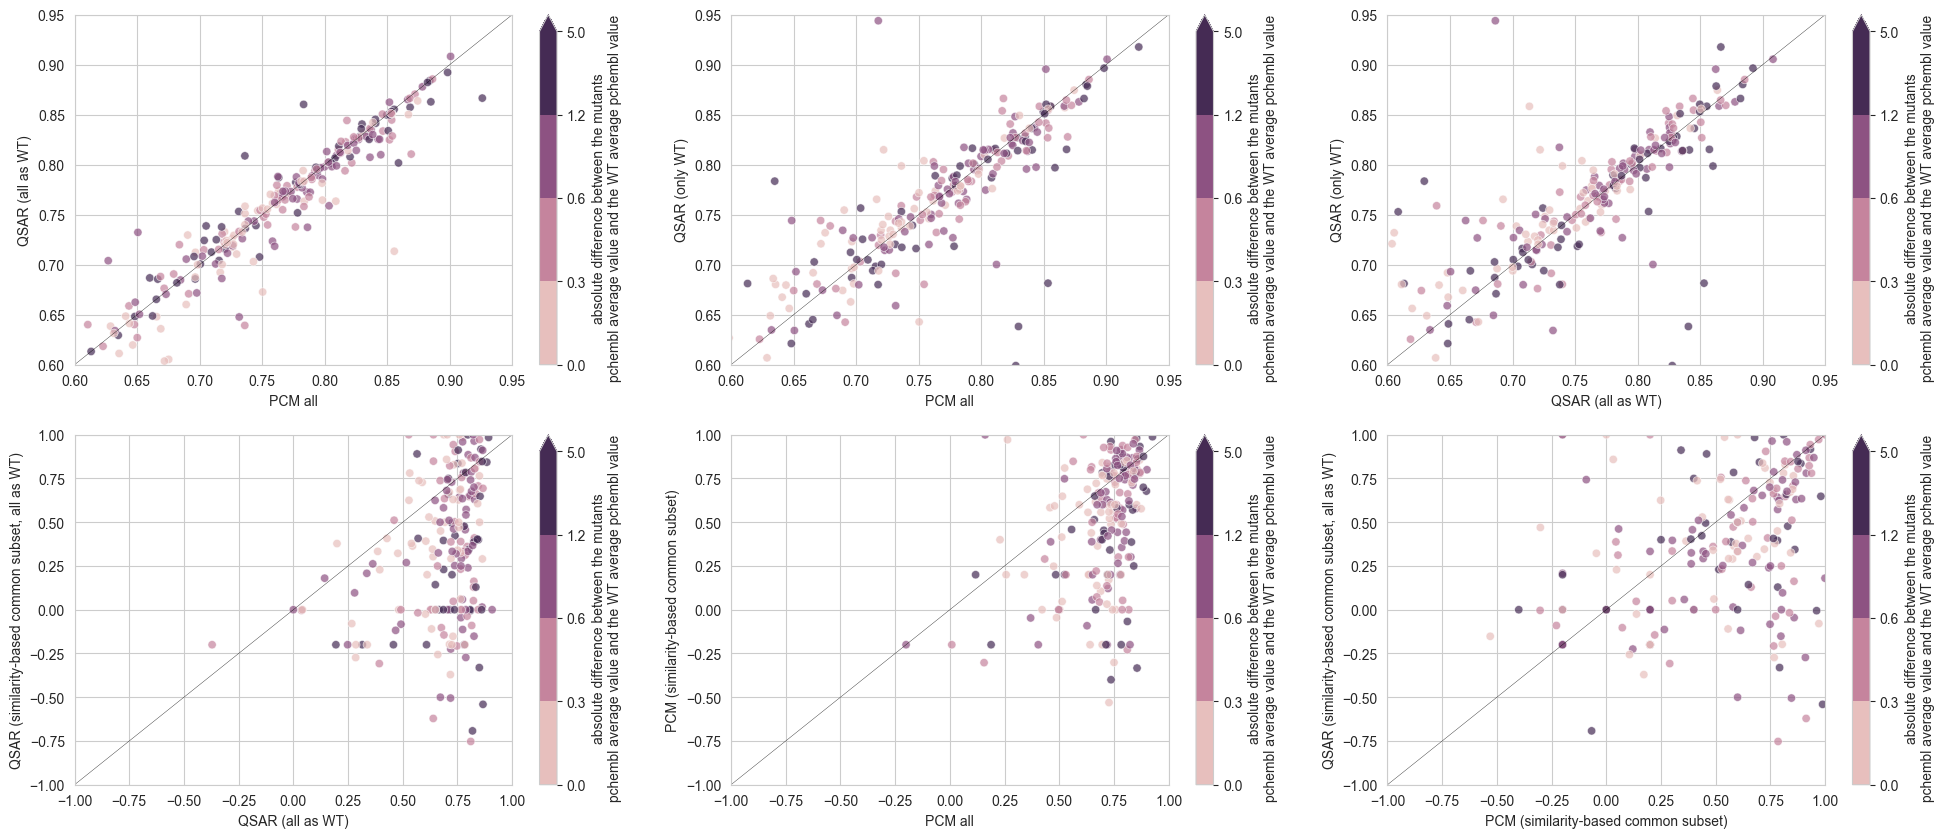

In [53]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Abs_difference_average_pChEMBL_value.svg'))

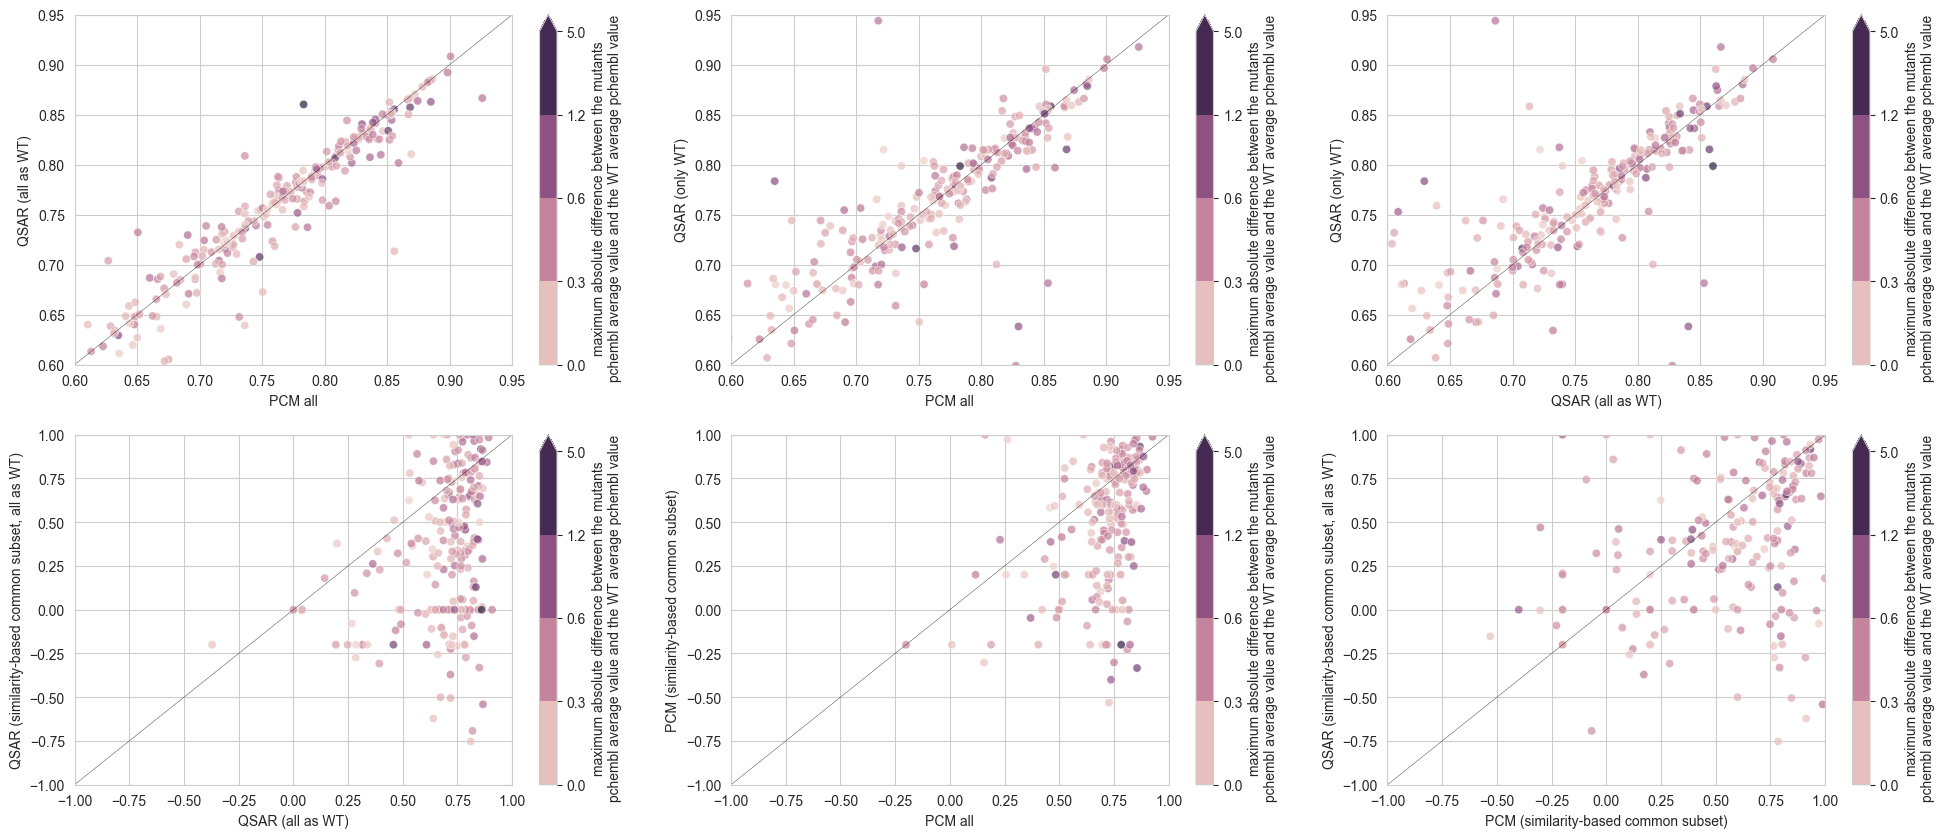

In [54]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0],
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data[mean_scatter_data.num_datapoints_total_common != 0], 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM all', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM all', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM all', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Max_abs_difference_weighted_average_pChEMBL_value.svg'))

## Summarize statistics

Obtain gene names from accession

In [55]:
accession_mapping = (pd.DataFrame((mean_scatter_data[(mean_scatter_data.num_datapoints_total > 1_000) &
                                                (mean_scatter_data.datapoints_mutant_percentage > 10)]
                                   [['accession', 'HGNC_symbol',
                                     'UniProtID', 'Organism']]
                                   .apply(lambda x: (x.get('accession'),
                                                     x.get('accession') + ' (' + (x.get('HGNC_symbol').split(';')[0]
                                                                                  if x.get('HGNC_symbol')
                                                                                  else x.get('UniProtID').split('_')[1]) + ')'
                                                     ),
                                          axis=1)
                                   )
                                 .tolist())
                                 .set_index(0)
                                 .to_dict(orient='dict')[1])

Summary table of average Pearson r for subgroups of proteins.

In [56]:
mean_scatter_data

accession  num_datapoints_total  num_datapoints_mutants  \
0    A0A045ISB3                 261.0                    16.0   
1        A2RI47                  23.0                     6.0   
2        A3EZI9                 794.0                   121.0   
3        A3EZJ3                 783.0                    37.0   
4        A4TVL0                  25.0                     3.0   
..          ...                   ...                     ...   
321      Q9UQM7                 186.0                     3.0   
322      Q9Y243                 416.0                    10.0   
323      Q9Y2R2                 279.0                     7.0   
324      Q9Y5X5                 129.0                    13.0   
325      Q9YQ12                1168.0                    76.0   

     datapoints_mutant_percentage  balance_coeff  num_datapoints_total_common  \
0                        6.130268       0.122605                         20.0   
1                       26.086957       0.521739                          7.0   
2                       15.239295       0.304786                         77.0   
3                        4.725415       0.094508                         43.0   
4                       12.000000       0.240000                          6.0   
..                            ...            ...                          ...   
321                      1.612903       0.032258                          0.0   
322                      2.403846       0.048077                          0.0   
323                      2.508961       0.050179                          8.0   
324                     10.077519       0.201550                         18.0   
325                      6.506849       0.130137                         45.0   

     num_datapoints_mutants_common  common_fraction_of_total  \
0                             20.0                  0.076628   
1                              7.0                  0.304348   
2                             49.0                  0.096977   
3                             37.0                  0.054917   
4                              6.0                  0.240000   
..                             ...                       ...   
321                            0.0                  0.000000   
322                            0.0                  0.000000   
323                            8.0                  0.028674   
324                           13.0                  0.139535   
325                           38.0                  0.038527   

     Pearson_r_PCM_common_True_per_mutant  Pearson_r_PCM_common_True_random  \
0                                0.561200                          0.988584   
1                                0.000000                          0.400000   
2                                0.583248                          0.857780   
3                                0.880199                          0.932835   
4                               -0.907991                         -0.200000   
..                                    ...                               ...   
321                                   NaN                               NaN   
322                                   NaN                               NaN   
323                              0.000000                         -0.200000   
324                              0.620039                          0.415091   
325                              0.751600                          0.876060   

     ...                                           Sequence  \
0    ...  MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...   
1    ...  MSNSKFNVRLLTEIAFMAALAFIISLIPNTVYGWIIVEIACIPILL...   
2    ...  APITAYAQQTRGLLGCIITSLTGRDKNQVEGEVQIVSTAAQTFLAT...   
3    ...  APITAYAQQTRGLLGCIITGLTGRDKNQVEGEVQIVSTAAQTFLAT...   
4    ...  MPLDAGGQNSTQMVLAPGASIFRCRQCGQTISRRDWLLPMGGDHEH...   
..   ...                                                ...   
321  ...  MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...   
322  ...  MSDVTIVKEGWVQKRGEYIK

In [57]:
((pd.concat([(mean_scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
                           'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common', 'common_fraction_of_total']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum',
                   'num_datapoints_total_common': 'sum'})
             .rename('All')),
             (pd.concat([mean_scatter_data,
                         pd.cut(mean_scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                    'Pearson_r_QSAR_complete_True_random': 'mean',
                    'Pearson_r_QSAR_complete_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum',
                    'num_datapoints_total_common': 'sum'
                    })
              .T
              ),
            (mean_scatter_data[mean_scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum',
                   'num_datapoints_total_common': 'sum'})
             .T),
            (mean_scatter_data[(mean_scatter_data.num_datapoints_total > 1_000) &
                         (mean_scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean',
                   'num_datapoints_total_common': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (mean_scatter_data[(mean_scatter_data.num_datapoints_total <= 1_000) |
                         (mean_scatter_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean',
                   'num_datapoints_total_common': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                          ascending=False)
             ).T
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_complete_True_random': 'avg PCM',
                  'Pearson_r_QSAR_complete_True_random': 'avg QSAR (all as WT)',
                  'Pearson_r_QSAR_complete_False_random': 'avg QSAR (only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)',
                  'num_datapoints_total_common': '# data points (common subset)'})
 .astype({'# data points': int})
 .round({'avg PCM': 3,
         'avg QSAR (all as WT)': 3,
         'avg QSAR (only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1,
         '# data points (common subset)': 0})
 )

avg PCM  avg QSAR (all as WT)  avg QSAR (only WT)  \
All                  0.653                 0.634               0.654   
(5.0, 100.0]         0.396                 0.352               0.363   
(100.0, 500.0]       0.704                 0.690               0.691   
(500.0, 2000.0]      0.746                 0.737               0.747   
(2000.0, 20500.0]    0.769                 0.763               0.764   
...                    ...                   ...                 ...   
P56690               0.000                 0.000                 NaN   
P15038               0.000                 0.000                 NaN   
Q05320               0.000                 0.000                 NaN   
Q10471               0.000                 0.000                 NaN   
Q9NZN5               0.000                 0.000                 NaN   

                   # data points  # data points (common subset)  \
All                       453660                        20172.0   
(5.0, 100.0]                3257                          758.0   
(100.0, 500.0]             19694                         1428.0   
(500.0, 2000.0]            84426                         3923.0   
(2000.0, 20500.0]         346283                        14063.0   
...                          ...                            ...   
P56690                         5                            5.0   
P15038                         5                            0.0   
Q05320                         5                            0.0   
Q10471                         5                            0.0   
Q9NZN5                         5                            0.0   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P56690                                       100.0  
P15038                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 6 columns]

Summary table of SD of Pearson r for subgroups of proteins.

In [58]:
(pd.concat([pd.DataFrame((scatter_data
                         .groupby('accession')
                         .agg({'Pearson_r_PCM_complete_True_random': 'std',
                               'Pearson_r_QSAR_complete_True_random': 'std',
                               'Pearson_r_QSAR_complete_False_random': 'std',
                               'num_datapoints_total': 'mean',
                               'num_datapoints_mutants': 'mean',
                               'num_datapoints_total_common': 'mean'})
                         .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                               'Pearson_r_QSAR_complete_True_random': 'mean',
                               'Pearson_r_QSAR_complete_False_random': 'mean',
                               'num_datapoints_total': 'sum',
                               'num_datapoints_mutants': 'sum',
                               'num_datapoints_total_common': 'sum'})
                         .rename('All'))
                        ).T
          .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100),
           (pd.concat([(scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_complete_True_random': 'std',
                              'Pearson_r_QSAR_complete_True_random': 'std',
                              'Pearson_r_QSAR_complete_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean',
                              'num_datapoints_total_common': 'mean'})),
                       pd.cut((scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_complete_True_random': 'std',
                              'Pearson_r_QSAR_complete_True_random': 'std',
                              'Pearson_r_QSAR_complete_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean',
                              'num_datapoints_total_common': 'mean'})).num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                       ],
                      axis=1)
            .groupby(['cut_num_datapoints_total'])
            .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                  'Pearson_r_QSAR_complete_True_random': 'mean',
                  'Pearson_r_QSAR_complete_False_random': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum',
                  'num_datapoints_total_common': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean',
                  'num_datapoints_total_common': 'mean'})
            .merge(proteins, on='accession')
            .query("color != ''")
            .groupby('color')
            .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                  'Pearson_r_QSAR_complete_True_random': 'mean',
                  'Pearson_r_QSAR_complete_False_random': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum',
                  'num_datapoints_total_common': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean',
                  'num_datapoints_total_common': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total > 1_000) & (ratio_mutants > 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            ),
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_True_random': 'std',
                  'Pearson_r_QSAR_complete_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean',
                  'num_datapoints_total_common': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total <= 1_000) | (ratio_mutants <= 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                         ascending=False)
            )],
           axis=0)
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_complete_True_random': 'std PCM',
                  'Pearson_r_QSAR_complete_True_random': 'std QSAR (all as WT)',
                  'Pearson_r_QSAR_complete_False_random': 'std QSAR (only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)',
                  'num_datapoints_total_common': '# data points (common subset)'})
 .astype({'# data points': int})
 .round({'std PCM': 3,
         'std QSAR (all as WT)': 3,
         'std QSAR (only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1,
         '# data points (common subset)': 0})
 )

std PCM  std QSAR (all as WT)  std QSAR (only WT)  \
All                  0.117                 0.116               0.121   
(5.0, 100.0]         0.322                 0.323               0.378   
(100.0, 500.0]       0.085                 0.083               0.094   
(500.0, 2000.0]      0.038                 0.039               0.041   
(2000.0, 20500.0]    0.018                 0.017               0.017   
...                    ...                   ...                 ...   
P56690               0.000                 0.000                 NaN   
P15038               0.000                 0.000                 NaN   
Q05320               0.000                 0.000                 NaN   
Q10471               0.000                 0.000                 NaN   
Q9NZN5               0.000                 0.000                 NaN   

                   # data points  # data points (common subset)  \
All                       453660                        20172.0   
(5.0, 100.0]                3257                          758.0   
(100.0, 500.0]             19694                         1428.0   
(500.0, 2000.0]            84426                         3923.0   
(2000.0, 20500.0]         346283                        14063.0   
...                          ...                            ...   
P56690                         5                            5.0   
P15038                         5                            0.0   
Q05320                         5                            0.0   
Q10471                         5                            0.0   
Q9NZN5                         5                            0.0   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P56690                                       100.0  
P15038                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 6 columns]

Obtain the same tables for the similarity-based common subgroups.
1. Average Pearson r per protein subgroup
2. Average SD of Pearson r per protein subgroup

In [59]:
((pd.concat([(mean_scatter_data[['Pearson_r_PCM_common_True_random', 'Pearson_r_QSAR_common_True_random', 'Pearson_r_QSAR_common_False_random',
                           'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum',
                   'num_datapoints_total_common': 'sum'})
             .rename('All')),
             (pd.concat([mean_scatter_data,
                         pd.cut(mean_scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'Pearson_r_PCM_common_True_random': 'mean',
                    'Pearson_r_QSAR_common_True_random': 'mean',
                    'Pearson_r_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum',
                    'num_datapoints_total_common': 'sum'
                    })
              .T
              ),
            (mean_scatter_data[mean_scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_common_True_random', 'Pearson_r_QSAR_common_True_random', 'Pearson_r_QSAR_common_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum',
                   'num_datapoints_total_common': 'sum'})
             .T),
            (mean_scatter_data[(mean_scatter_data.num_datapoints_total > 1_000) &
                         (mean_scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_common_True_random', 'Pearson_r_QSAR_common_True_random', 'Pearson_r_QSAR_common_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean',
                   'num_datapoints_total_common': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (mean_scatter_data[(mean_scatter_data.num_datapoints_total <= 1_000) |
                         (mean_scatter_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             [['Pearson_r_PCM_common_True_random', 'Pearson_r_QSAR_common_True_random', 'Pearson_r_QSAR_common_False_random',
               'num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common']]
             .agg({'Pearson_r_PCM_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_True_random': 'mean',
                   'Pearson_r_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean',
                   'num_datapoints_total_common': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants', 'num_datapoints_total_common'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_common_True_random': 'avg PCM (similarity-based common subset)',
                  'Pearson_r_QSAR_common_True_random': 'avg QSAR (similarity-based common subset; all as WT)',
                  'Pearson_r_QSAR_common_False_random': 'avg QSAR (similarity-based common subset; only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)',
                  'num_datapoints_total_common': '# data points (common subset)'})
 .astype({'# data points': int})
 .round({'avg PCM (similarity-based common subset)': 3,
         'avg QSAR (similarity-based common subset; all as WT)': 3,
         'avg QSAR (similarity-based common subset; only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1,
         '# data points (common subset)': 0})
 )


avg PCM (similarity-based common subset)  \
All                                                   0.487   
(5.0, 100.0]                                          0.310   
(100.0, 500.0]                                        0.507   
(500.0, 2000.0]                                       0.484   
(2000.0, 20500.0]                                     0.610   
...                                                     ...   
P56690                                                0.000   
P15038                                                  NaN   
Q05320                                                  NaN   
Q10471                                                  NaN   
Q9NZN5                                                  NaN   

                   avg QSAR (similarity-based common subset; all as WT)  \
All                                                            0.330      
(5.0, 100.0]                                                   0.165      
(100.0, 500.0]                                                 0.297      
(500.0, 2000.0]                                                0.398      
(2000.0, 20500.0]                                              0.411      
...                                                              ...      
P56690                                                         0.000      
P15038                                                           NaN      
Q05320                                                           NaN      
Q10471                                                           NaN      
Q9NZN5                                                           NaN      

                   avg QSAR (similarity-based common subset; only WT)  \
All                                                            0.266    
(5.0, 100.0]                                                   0.174    
(100.0, 500.0]                                                 0.145    
(500.0, 2000.0]                                                0.217    
(2000.0, 20500.0]                                              0.406    
...                                                              ...    
P56690                                                           NaN    
P15038                                                           NaN    
Q05320                                                           NaN    
Q10471                                                           NaN    
Q9NZN5                                                           NaN    

                   # data points  # data points (common subset)  \
All                       453660                        20172.0   
(5.0, 100.0]                3257                          758.0   
(100.0, 500.0]             19694                         1428.0   
(500.0, 2000.0]            84426                         3923.0   
(2000.0, 20500.0]         346283                        14063.0   
...                          ...                            ...   
P56690                         5                            5.0   
P15038                         5                            0.0   
Q05320                         5                            0.0   
Q10471                         5                            0.0   
Q9NZN5                         5                            0.0   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P56690                                       100.0  
P15038                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 6 columns]

In [60]:
((pd.concat([pd.DataFrame((scatter_data
                           .groupby('accession')
                           .agg({'Pearson_r_PCM_common_True_random': 'std',
                                 'Pearson_r_QSAR_common_True_random': 'std',
                                 'Pearson_r_QSAR_common_False_random': 'std',
                                 'num_datapoints_total': 'mean',
                                 'num_datapoints_mutants': 'mean'})
                           .agg({'Pearson_r_PCM_common_True_random': 'mean',
                                 'Pearson_r_QSAR_common_True_random': 'mean',
                                 'Pearson_r_QSAR_common_False_random': 'mean',
                                 'num_datapoints_total': 'sum',
                                 'num_datapoints_mutants': 'sum'})
                           .rename('All'))
                          ).T
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100),
             (pd.concat([(scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_common_True_random': 'std',
                              'Pearson_r_QSAR_common_True_random': 'std',
                              'Pearson_r_QSAR_common_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})),
                       pd.cut((scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_common_True_random': 'std',
                              'Pearson_r_QSAR_common_True_random': 'std',
                              'Pearson_r_QSAR_common_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})).num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                       ],
                      axis=1)
            .groupby(['cut_num_datapoints_total'])
            .agg({'Pearson_r_PCM_common_True_random': 'mean',
                  'Pearson_r_QSAR_common_True_random': 'mean',
                  'Pearson_r_QSAR_common_False_random': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
             
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_random': 'std',
                  'Pearson_r_QSAR_common_True_random': 'std',
                  'Pearson_r_QSAR_common_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .merge(proteins, on='accession')
            .query("color != ''")
            .groupby('color')
            .agg({'Pearson_r_PCM_common_True_random': 'mean',
                  'Pearson_r_QSAR_common_True_random': 'mean',
                  'Pearson_r_QSAR_common_False_random': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
            
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_random': 'std',
                  'Pearson_r_QSAR_common_True_random': 'std',
                  'Pearson_r_QSAR_common_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total > 1_000) & (ratio_mutants > 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            ),
            
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_random': 'std',
                  'Pearson_r_QSAR_common_True_random': 'std',
                  'Pearson_r_QSAR_common_False_random': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total <= 1_000) | (ratio_mutants <= 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            )
            ],
           axis=0)
 )
    .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_common_True_random': 'std PCM (similarity-based common subset)',
                  'Pearson_r_QSAR_common_True_random': 'std QSAR (similarity-based common subset; all as WT)',
                  'Pearson_r_QSAR_common_False_random': 'std QSAR (similarity-based common subset; only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM (similarity-based common subset)': 3,
         'std QSAR (similarity-based common subset; all as WT)': 3,
         'std QSAR (similarity-based common subset; only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

std PCM (similarity-based common subset)  \
All                                                   0.376   
(5.0, 100.0]                                          0.371   
(100.0, 500.0]                                        0.408   
(500.0, 2000.0]                                       0.431   
(2000.0, 20500.0]                                     0.297   
...                                                     ...   
P15038                                                  NaN   
P56690                                                0.000   
Q05320                                                  NaN   
Q10471                                                  NaN   
Q9NZN5                                                  NaN   

                   std QSAR (similarity-based common subset; all as WT)  \
All                                                            0.353      
(5.0, 100.0]                                                   0.351      
(100.0, 500.0]                                                 0.402      
(500.0, 2000.0]                                                0.333      
(2000.0, 20500.0]                                              0.334      
...                                                              ...      
P15038                                                           NaN      
P56690                                                         0.000      
Q05320                                                           NaN      
Q10471                                                           NaN      
Q9NZN5                                                           NaN      

                   std QSAR (similarity-based common subset; only WT)  \
All                                                            0.449    
(5.0, 100.0]                                                   0.421    
(100.0, 500.0]                                                 0.570    
(500.0, 2000.0]                                                0.425    
(2000.0, 20500.0]                                              0.406    
...                                                              ...    
P15038                                                           NaN    
P56690                                                           NaN    
Q05320                                                           NaN    
Q10471                                                           NaN    
Q9NZN5                                                           NaN    

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 5 columns]

Obtain the same tables for the LOVO validation on the complete sets.
- Average Pearson r per protein subgroup
- Average SD of Pearson r per protein subgroup

It is not possible to do a per-mutant modelling validation with QSAR models in which mutants have been removed, so only the PCM and the QSAR models considering all mutants as WT are available below.

In [61]:
((pd.concat([(mean_scatter_data[['Pearson_r_PCM_complete_True_per_mutant', 'Pearson_r_QSAR_complete_True_per_mutant',
                           'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([mean_scatter_data,
                         pd.cut(mean_scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                    'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (mean_scatter_data[mean_scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_complete_True_per_mutant', 'Pearson_r_QSAR_complete_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (mean_scatter_data[(mean_scatter_data.num_datapoints_total > 1_000) &
                         (mean_scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_per_mutant', 'Pearson_r_QSAR_complete_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (mean_scatter_data[(mean_scatter_data.num_datapoints_total <= 1_000) |
                         (mean_scatter_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_per_mutant', 'Pearson_r_QSAR_complete_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_complete_True_per_mutant': 'avg PCM (LOVO)',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'avg QSAR (LOVO; all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM (LOVO)': 3,
         'avg QSAR (LOVO; all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

avg PCM (LOVO)  avg QSAR (LOVO; all as WT)  # data points  \
All                         0.252                       0.257         453660   
(5.0, 100.0]                0.170                       0.181           3257   
(100.0, 500.0]              0.229                       0.247          19694   
(500.0, 2000.0]             0.284                       0.288          84426   
(2000.0, 20500.0]           0.325                       0.311         346283   
...                           ...                         ...            ...   
P15038                      0.000                       0.000              5   
P56690                      0.000                       0.000              5   
Q05320                      0.000                       0.000              5   
Q10471                      0.999                       0.999              5   
Q9NZN5                      0.000                       0.000              5   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

In [62]:
(pd.concat([pd.DataFrame((scatter_data
                         .groupby('accession')
                         .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                               'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                               'num_datapoints_total': 'mean',
                               'num_datapoints_mutants': 'mean'})
                         .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                               'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                               'num_datapoints_total': 'sum',
                               'num_datapoints_mutants': 'sum'})
                         .rename('All'))
                        ).T
          .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100),
           (pd.concat([(scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                              'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})),
                       pd.cut((scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                              'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})).num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                       ],
                      axis=1)
            .groupby(['cut_num_datapoints_total'])
            .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .merge(proteins, on='accession')
            .query("color != ''")
            .groupby('color')
            .agg({'Pearson_r_PCM_complete_True_per_mutant': 'mean',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total > 1_000) & (ratio_mutants > 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            ),
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_complete_True_per_mutant': 'std',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total <= 1_000) | (ratio_mutants <= 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            )],
           axis=0)
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_complete_True_per_mutant': 'std PCM',
                  'Pearson_r_QSAR_complete_True_per_mutant': 'std QSAR (all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM': 3,
         'std QSAR (all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

std PCM  std QSAR (all as WT)  # data points  \
All                  0.389                 0.393         453660   
(5.0, 100.0]         0.317                 0.323           3257   
(100.0, 500.0]       0.400                 0.410          19694   
(500.0, 2000.0]      0.430                 0.423          84426   
(2000.0, 20500.0]    0.402                 0.409         346283   
...                    ...                   ...            ...   
P15038                 NaN                   NaN              5   
P56690               0.000                 0.000              5   
Q05320               0.000                 0.000              5   
Q10471               0.002                 0.002              5   
Q9NZN5               0.000                 0.000              5   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

Obtain the same tables for the LOVO validation on similarity-based common subsets.
- Average Pearson r per protein subgroup
- Average SD of Pearson r per protein subgroup

As above, it is not possible to do a per-mutant modelling validation with QSAR models in which mutants have been removed, so only the PCM and the QSAR models considering all mutants as WT are available below.

In [63]:
((pd.concat([(mean_scatter_data[['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant',
                           'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([mean_scatter_data,
                         pd.cut(mean_scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                    'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (mean_scatter_data[mean_scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (mean_scatter_data[(mean_scatter_data.num_datapoints_total > 1_000) &
                         (mean_scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (mean_scatter_data[(mean_scatter_data.num_datapoints_total <= 1_000) |
                         (mean_scatter_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             [['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                   'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_common_True_per_mutant': 'avg PCM',
                  'Pearson_r_QSAR_common_True_per_mutant': 'avg QSAR (all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM': 3,
         'avg QSAR (all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

avg PCM  avg QSAR (all as WT)  # data points  \
All                  0.492                 0.511         453660   
(5.0, 100.0]         0.300                 0.336           3257   
(100.0, 500.0]       0.524                 0.541          19694   
(500.0, 2000.0]      0.542                 0.563          84426   
(2000.0, 20500.0]    0.560                 0.569         346283   
...                    ...                   ...            ...   
P15038                 NaN                   NaN              5   
P56690               0.000                 0.000              5   
Q05320                 NaN                   NaN              5   
Q10471                 NaN                   NaN              5   
Q9NZN5                 NaN                   NaN              5   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

In [64]:
(pd.concat([pd.DataFrame((scatter_data
                         .groupby('accession')
                         .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                               'Pearson_r_QSAR_common_True_per_mutant': 'std',
                               'num_datapoints_total': 'mean',
                               'num_datapoints_mutants': 'mean'})
                         .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                               'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                               'num_datapoints_total': 'sum',
                               'num_datapoints_mutants': 'sum'})
                         .rename('All'))
                        ).T
          .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100),
           (pd.concat([(scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                              'Pearson_r_QSAR_common_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})),
                       pd.cut((scatter_data
                        .groupby('accession')
                        .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                              'Pearson_r_QSAR_common_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'})).num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                       ],
                      axis=1)
            .groupby(['cut_num_datapoints_total'])
            .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                  'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                  'Pearson_r_QSAR_common_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .merge(proteins, on='accession')
            .query("color != ''")
            .groupby('color')
            .agg({'Pearson_r_PCM_common_True_per_mutant': 'mean',
                  'Pearson_r_QSAR_common_True_per_mutant': 'mean',
                  'num_datapoints_total': 'sum',
                  'num_datapoints_mutants': 'sum'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            ),
           (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                  'Pearson_r_QSAR_common_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total > 1_000) & (ratio_mutants > 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            ),
            (scatter_data
            .groupby('accession')
            .agg({'Pearson_r_PCM_common_True_per_mutant': 'std',
                  'Pearson_r_QSAR_common_True_per_mutant': 'std',
                  'num_datapoints_total': 'mean',
                  'num_datapoints_mutants': 'mean'})
            .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
            .query('(num_datapoints_total <= 1_000) | (ratio_mutants <= 10)')
            .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                         ascending=False)
            .T
            .rename(columns=accession_mapping)
            .T
            )],
           axis=0)
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'Pearson_r_PCM_common_True_per_mutant': 'std PCM',
                  'Pearson_r_QSAR_common_True_per_mutant': 'std QSAR (all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM': 3,
         'std QSAR (all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

std PCM  std QSAR (all as WT)  # data points  \
All                  0.234                 0.225         453660   
(5.0, 100.0]         0.217                 0.217           3257   
(100.0, 500.0]       0.241                 0.232          19694   
(500.0, 2000.0]      0.254                 0.234          84426   
(2000.0, 20500.0]    0.219                 0.217         346283   
...                    ...                   ...            ...   
P15038                 NaN                   NaN              5   
P56690               0.000                 0.000              5   
Q05320                 NaN                   NaN              5   
Q10471                 NaN                   NaN              5   
Q9NZN5                 NaN                   NaN              5   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

# Applicability domains

In [65]:
import pathlib

from natsort import natsorted

In [66]:
modelling_data_dir = '../data/frankenstein_modelling'
output_data_dir = '../analysis/modelling'

for dirpath in [output_data_dir, output_plot_dir]:
    if not os.path.exists(dirpath):
        print(f'Created {dirpath}')
        os.makedirs(dirpath)

In [67]:
ad_data = []
# PCM random CV
for fpath in natsorted(pathlib.Path(modelling_data_dir).glob('*applicability_domains.tsv')):
    if 'external' in fpath.as_posix():
        continue
    accession = fpath.as_posix().split('_')[-3].split('.')[0]
    subset = pd.read_csv(fpath.as_posix(), sep='\t', index_col=0)
    subset = subset.rename(columns={'0': 'AD'})
    subset['accession'] = accession
    subset['subset'] = 'common' if 'common_subset' in str(fpath) else 'complete'
    subset['contains_mutants'] = False if 'nomutant' in str(fpath) else True
    subset['modeltype'] = 'PCM' if 'pcm' in str(fpath) else 'QSAR'
    subset['crossval'] = 'random' if 'randomsplit' in str(fpath) else 'per mutant'
    ad_data.append(subset)
ad_data = pd.concat(ad_data).reset_index()
ad_data = ad_data.rename(columns={'index': 'folds'})
ad_data.to_csv(os.path.join(output_data_dir, 'applicability_domains.tsv.xz'), sep='\t', index=False)

In [68]:
ad_data

folds        AD   accession    subset  contains_mutants modeltype  \
0      Fold 1  0.500000  A0A045ISB3    common              True       PCM   
1      Fold 2  0.250000  A0A045ISB3    common              True       PCM   
2      Fold 3  0.500000  A0A045ISB3    common              True       PCM   
3      Fold 4  0.500000  A0A045ISB3    common              True       PCM   
4      Fold 5  0.500000  A0A045ISB3    common              True       PCM   
...       ...       ...         ...       ...               ...       ...   
21611  Fold 3  0.969466      Q99835  complete              True      QSAR   
21612  Fold 4  0.900763      Q99835  complete              True      QSAR   
21613  Fold 5  0.954198      Q99835  complete              True      QSAR   
21614    Mean  0.946565      Q99835  complete              True      QSAR   
21615      SD  0.023652      Q99835  complete              True      QSAR   

         crossval  
0      per mutant  
1      per mutant  
2      per mutant  
3      per mutant  
4      per mutant  
...           ...  
21611      random  
21612      random  
21613      random  
21614      random  
21615      random  

[21616 rows x 7 columns]

In [69]:
pivoted_ad_data = ad_data.pivot(columns=['modeltype', 'subset', 'contains_mutants', 'crossval'], values=['AD'], index=['folds', 'accession']).reset_index()
pivoted_ad_data.columns = ['_'.join(filter(lambda x: x != '', map(str, indices))).replace(' ', '_') for indices in pivoted_ad_data.columns.values]
pivoted_ad_data = pivoted_ad_data

In [70]:
pivoted_ad_data

folds   accession  AD_PCM_common_True_per_mutant  \
0     Fold 1  A0A045ISB3                       0.500000   
1     Fold 1      A2RI47                       1.000000   
2     Fold 1      A3EZI9                       0.607143   
3     Fold 1      A3EZJ3                       0.000000   
4     Fold 1      A4TVL0                       1.000000   
...      ...         ...                            ...   
2924      SD      Q9WKE8                            NaN   
2925      SD      Q9Y243                            NaN   
2926      SD      Q9Y2R2                       0.000000   
2927      SD      Q9Y5X5                       0.279942   
2928      SD      Q9YQ12                       0.421783   

      AD_PCM_common_False_random  AD_PCM_common_True_random  \
0                            NaN                   0.250000   
1                            NaN                   1.000000   
2                       0.666667                   0.437500   
3                       1.000000                   0.444444   
4                            NaN                   0.500000   
...                          ...                        ...   
2924                         NaN                        NaN   
2925                         NaN                        NaN   
2926                         NaN                   0.000000   
2927                    0.000000                   0.161589   
2928                    0.374166                   0.180534   

      AD_PCM_complete_True_per_mutant  AD_PCM_complete_False_random  \
0                            0.008163                      0.959184   
1                            1.000000                      0.750000   
2                            0.138187                      0.748148   
3                            0.020107                      0.960000   
4                            1.000000                      1.000000   
...                               ...                           ...   
2924                              NaN                           NaN   
2925                         0.138424                      0.035084   
2926                         0.000000                      0.018046   
2927                         0.265924                      0.078315   
2928                         0.208295                      0.015330   

      AD_PCM_complete_True_random  AD_QSAR_common_True_per_mutant  \
0                        0.849057                        0.000000   
1                        0.600000                        0.000000   
2                        0.874214                        0.642857   
3                        0.942675                        0.000000   
4                        0.600000                        1.000000   
...                           ...                             ...   
2924                          NaN                             NaN   
2925                     0.018668                             NaN   
2926                     0.017901                        0.433013   
2927                     0.097617                        0.218529   
2928                     0.022034                        0.421783   

      AD_QSAR_common_False_random  AD_QSAR_common_True_random  \
0                             NaN                    0.000000   
1                             NaN                    0.500000   
2                        0.500000                    0.812500   
3                        1.000000                    0.444444   
4                             NaN                    0.000000   
...                           ...                         ...   
2924                          NaN                    0.021671   
2925                          NaN                         NaN   
2926                          NaN                    0.489898   
2927                     0.000000                    0.133333   
2928                     0.374166                    0.108866   

      AD_QSAR_complete_True_per_mutant  AD_QSAR_complete_False_random  \
0    

In [71]:
pivoted_ad_data = pivoted_ad_data.merge(counts, on='accession')#.merge(proteins, on='accession')
pivoted_ad_data['datapoints_mutant_percentage'] = pivoted_ad_data.num_datapoints_mutants / pivoted_ad_data.num_datapoints_total * 100

In [72]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_random': 'mean',
                    'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_complete_True_random': 'mean',
                              'AD_QSAR_complete_True_random': 'mean',
                              'AD_QSAR_complete_False_random': 'mean',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_complete_True_random': 'mean',
                                      'AD_QSAR_complete_True_random': 'mean',
                                      'AD_QSAR_complete_False_random': 'mean',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_complete_True_random': 'mean',
                    'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_random': 'mean',
                    'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_complete_True_random': 'avg PCM',
                  'AD_QSAR_complete_True_random': 'avg QSAR (all as WT)',
                  'AD_QSAR_complete_False_random': 'avg QSAR (only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM': 3,
         'avg QSAR (all as WT)': 3,
         'avg QSAR (only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3707413597.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3707413597.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


avg PCM  avg QSAR (all as WT)  avg QSAR (only WT)  \
All                  0.847                 0.849               0.872   
(5.0, 100.0]         0.633                 0.619               0.672   
(100.0, 500.0]       0.881                 0.893               0.894   
(500.0, 2000.0]      0.929                 0.934               0.934   
(2000.0, 20500.0]    0.947                 0.953               0.952   
...                    ...                   ...                 ...   
P15038               0.800                 0.800                 NaN   
P56690               0.600                 0.800                 NaN   
Q05320               1.000                 1.000                 NaN   
Q10471               0.600                 0.600                 NaN   
Q9NZN5               1.000                 0.800                 NaN   

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 5 columns]

In [73]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_random': 'std',
                    'AD_QSAR_complete_True_random': 'std',
                    'AD_QSAR_complete_False_random': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_complete_True_random': 'std',
                              'AD_QSAR_complete_True_random': 'std',
                              'AD_QSAR_complete_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_complete_True_random': 'std',
                                      'AD_QSAR_complete_True_random': 'std',
                                      'AD_QSAR_complete_False_random': 'std',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_complete_True_random': 'mean',
                    'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_random': 'std',
                    'AD_QSAR_complete_True_random': 'std',
                    'AD_QSAR_complete_False_random': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_complete_True_random': 'mean',
                   'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_random': 'std',
                   'AD_QSAR_complete_True_random': 'std',
                   'AD_QSAR_complete_False_random': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_random': 'std',
                   'AD_QSAR_complete_True_random': 'std',
                   'AD_QSAR_complete_False_random': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_complete_True_random': 'std PCM',
                  'AD_QSAR_complete_True_random': 'std QSAR (all as WT)',
                  'AD_QSAR_complete_False_random': 'std QSAR (only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM': 3,
         'std QSAR (all as WT)': 3,
         'std QSAR (only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3048264985.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3048264985.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


std PCM  std QSAR (all as WT)  std QSAR (only WT)  \
All                  0.072                 0.077               0.073   
(5.0, 100.0]         0.199                 0.224               0.230   
(100.0, 500.0]       0.056                 0.052               0.056   
(500.0, 2000.0]      0.021                 0.020               0.021   
(2000.0, 20500.0]    0.010                 0.009               0.011   
...                    ...                   ...                 ...   
P15038               0.447                 0.447                 NaN   
P56690               0.548                 0.447                 NaN   
Q05320               0.000                 0.000                 NaN   
Q10471               0.548                 0.548                 NaN   
Q9NZN5               0.000                 0.447                 NaN   

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 5 columns]

In [74]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_common_True_random': 'mean',
                              'AD_QSAR_common_True_random': 'mean',
                              'AD_QSAR_common_False_random': 'mean',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_common_True_random': 'mean',
                                      'AD_QSAR_common_True_random': 'mean',
                                      'AD_QSAR_common_False_random': 'mean',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_common_True_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_common_True_random': 'avg PCM (similarity-based common subset)',
                  'AD_QSAR_common_True_random': 'avg QSAR (similarity-based common subset; all as WT)',
                  'AD_QSAR_common_False_random': 'avg QSAR (similarity-based common subset; only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM (similarity-based common subset)': 3,
         'avg QSAR (similarity-based common subset; all as WT)': 3,
         'avg QSAR (similarity-based common subset; only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\2032464091.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\2032464091.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


avg PCM (similarity-based common subset)  \
All                                                   0.424   
(5.0, 100.0]                                          0.414   
(100.0, 500.0]                                        0.327   
(500.0, 2000.0]                                       0.427   
(2000.0, 20500.0]                                     0.507   
...                                                     ...   
P15038                                                  NaN   
P56690                                                0.600   
Q05320                                                  NaN   
Q10471                                                  NaN   
Q9NZN5                                                  NaN   

                   avg QSAR (similarity-based common subset; all as WT)  \
All                                                            0.348      
(5.0, 100.0]                                                   0.232      
(100.0, 500.0]                                                 0.278      
(500.0, 2000.0]                                                0.375      
(2000.0, 20500.0]                                              0.468      
...                                                              ...      
P15038                                                           NaN      
P56690                                                         0.800      
Q05320                                                           NaN      
Q10471                                                           NaN      
Q9NZN5                                                           NaN      

                   avg QSAR (similarity-based common subset; only WT)  \
All                                                            0.660    
(5.0, 100.0]                                                   0.570    
(100.0, 500.0]                                                 0.655    
(500.0, 2000.0]                                                0.656    
(2000.0, 20500.0]                                              0.689    
...                                                              ...    
P15038                                                           NaN    
P56690                                                           NaN    
Q05320                                                           NaN    
Q10471                                                           NaN    
Q9NZN5                                                           NaN    

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 5 columns]

In [75]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_random': 'std',
                    'AD_QSAR_common_True_random': 'std',
                    'AD_QSAR_common_False_random': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_common_True_random': 'std',
                              'AD_QSAR_common_True_random': 'std',
                              'AD_QSAR_common_False_random': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_common_True_random': 'std',
                                      'AD_QSAR_common_True_random': 'std',
                                      'AD_QSAR_common_False_random': 'std',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_common_True_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_random': 'std',
                    'AD_QSAR_common_True_random': 'std',
                    'AD_QSAR_common_False_random': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_common_True_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_random': 'std',
                   'AD_QSAR_common_True_random': 'std',
                   'AD_QSAR_common_False_random': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_random': 'std',
                   'AD_QSAR_common_True_random': 'std',
                   'AD_QSAR_common_False_random': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_common_True_random': 'std PCM (similarity-based common subset)',
                  'AD_QSAR_common_True_random': 'std QSAR (similarity-based common subset; all as WT)',
                  'AD_QSAR_common_False_random': 'std QSAR (similarity-based common subset; only WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM (similarity-based common subset)': 3,
         'std QSAR (similarity-based common subset; all as WT)': 3,
         'std QSAR (similarity-based common subset; only WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3196299173.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\3196299173.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


std PCM (similarity-based common subset)  \
All                                                   0.139   
(5.0, 100.0]                                          0.153   
(100.0, 500.0]                                        0.133   
(500.0, 2000.0]                                       0.161   
(2000.0, 20500.0]                                     0.108   
...                                                     ...   
P15038                                                  NaN   
P56690                                                0.548   
Q05320                                                  NaN   
Q10471                                                  NaN   
Q9NZN5                                                  NaN   

                   std QSAR (similarity-based common subset; all as WT)  \
All                                                            0.161      
(5.0, 100.0]                                                   0.186      
(100.0, 500.0]                                                 0.161      
(500.0, 2000.0]                                                0.161      
(2000.0, 20500.0]                                              0.142      
...                                                              ...      
P15038                                                           NaN      
P56690                                                         0.447      
Q05320                                                           NaN      
Q10471                                                           NaN      
Q9NZN5                                                           NaN      

                   std QSAR (similarity-based common subset; only WT)  \
All                                                            0.280    
(5.0, 100.0]                                                   0.365    
(100.0, 500.0]                                                 0.316    
(500.0, 2000.0]                                                0.302    
(2000.0, 20500.0]                                              0.216    
...                                                              ...    
P15038                                                           NaN    
P56690                                                           NaN    
Q05320                                                           NaN    
Q10471                                                           NaN    
Q9NZN5                                                           NaN    

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 5 columns]

In [76]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                    'AD_QSAR_complete_True_per_mutant': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                              'AD_QSAR_complete_True_per_mutant': 'mean',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                                      'AD_QSAR_complete_True_per_mutant': 'mean',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=True).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                    'AD_QSAR_complete_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                    'AD_QSAR_complete_True_per_mutant': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_complete_True_per_mutant': 'avg PCM (LOVO)',
                  'AD_QSAR_complete_True_per_mutant': 'avg QSAR (LOVO; all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM (LOVO)': 3,
         'avg QSAR (LOVO; all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\137211879.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\137211879.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


avg PCM (LOVO)  avg QSAR (LOVO; all as WT)  # data points  \
All                         0.728                       0.719         453660   
(4.999, 100.0]              0.673                       0.637           3257   
(100.0, 500.0]              0.722                       0.732          19694   
(500.0, 2000.0]             0.750                       0.742          84426   
(2000.0, 20500.0]           0.766                       0.766         346283   
...                           ...                         ...            ...   
P15038                      1.000                       1.000              5   
P56690                      0.600                       0.800              5   
Q05320                      1.000                       0.875              5   
Q10471                      1.000                       1.000              5   
Q9NZN5                      1.000                       1.000              5   

                   mutant-measured data points (%)  
All                                            5.5  
(4.999, 100.0]                                29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

In [77]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_per_mutant': 'std',
                    'AD_QSAR_complete_True_per_mutant': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_complete_True_per_mutant': 'std',
                              'AD_QSAR_complete_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_complete_True_per_mutant': 'std',
                                      'AD_QSAR_complete_True_per_mutant': 'std',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                    'AD_QSAR_complete_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_complete_True_per_mutant': 'std',
                    'AD_QSAR_complete_True_per_mutant': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_complete_True_per_mutant': 'mean',
                   'AD_QSAR_complete_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_per_mutant': 'std',
                   'AD_QSAR_complete_True_per_mutant': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_complete_True_per_mutant': 'std',
                   'AD_QSAR_complete_True_per_mutant': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_complete_True_per_mutant': 'std PCM (LOVO)',
                  'AD_QSAR_complete_True_per_mutant': 'std QSAR (LOVO; all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM (LOVO)': 3,
         'std QSAR (LOVO; all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\410534103.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\410534103.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


std PCM (LOVO)  std QSAR (LOVO; all as WT)  # data points  \
All                         0.267                       0.283         453660   
(5.0, 100.0]                0.240                       0.283           3257   
(100.0, 500.0]              0.287                       0.285          19694   
(500.0, 2000.0]             0.249                       0.263          84426   
(2000.0, 20500.0]           0.297                       0.303         346283   
...                           ...                         ...            ...   
P15038                      0.000                       0.000              5   
P56690                      0.548                       0.447              5   
Q05320                      0.000                       0.250              5   
Q10471                      0.000                       0.000              5   
Q9NZN5                      0.000                       0.000              5   

                   mutant-measured data points (%)  
All                                            5.5  
(5.0, 100.0]                                  29.1  
(100.0, 500.0]                                10.0  
(500.0, 2000.0]                                4.5  
(2000.0, 20500.0]                              5.2  
...                                            ...  
P15038                                       100.0  
P56690                                       100.0  
Q05320                                       100.0  
Q10471                                       100.0  
Q9NZN5                                       100.0  

[335 rows x 4 columns]

In [78]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_per_mutant': 'mean',
                    'AD_QSAR_common_True_per_mutant': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_common_True_per_mutant': 'mean',
                              'AD_QSAR_common_True_per_mutant': 'mean',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_common_True_per_mutant': 'mean',
                                      'AD_QSAR_common_True_per_mutant': 'mean',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=True).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_common_True_per_mutant': 'mean',
                    'AD_QSAR_common_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_per_mutant': 'mean',
                    'AD_QSAR_common_True_per_mutant': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_common_True_per_mutant': 'avg PCM (LOVO; similarity-based common subset)',
                  'AD_QSAR_common_True_per_mutant': 'avg QSAR (LOVO; similarity-based common subset; all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'avg PCM (LOVO; similarity-based common subset)': 3,
         'avg QSAR (LOVO; similarity-based common subset; all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\170465716.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\170465716.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


avg PCM (LOVO; similarity-based common subset)  \
All                                                         0.647   
(4.999, 100.0]                                              0.727   
(100.0, 500.0]                                              0.572   
(500.0, 2000.0]                                             0.624   
(2000.0, 20500.0]                                           0.670   
...                                                           ...   
P15038                                                        NaN   
P56690                                                      0.600   
Q05320                                                        NaN   
Q10471                                                        NaN   
Q9NZN5                                                        NaN   

                   avg QSAR (LOVO; similarity-based common subset; all as WT)  \
All                                                            0.569            
(4.999, 100.0]                                                 0.540            
(100.0, 500.0]                                                 0.531            
(500.0, 2000.0]                                                0.546            
(2000.0, 20500.0]                                              0.647            
...                                                              ...            
P15038                                                           NaN            
P56690                                                         0.800            
Q05320                                                           NaN            
Q10471                                                           NaN            
Q9NZN5                                                           NaN            

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(4.999, 100.0]              3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 4 columns]

In [79]:
((pd.concat([(pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_per_mutant': 'std',
                    'AD_QSAR_common_True_per_mutant': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_PCM_common_True_per_mutant': 'std',
                              'AD_QSAR_common_True_per_mutant': 'std',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_PCM_common_True_per_mutant': 'std',
                                      'AD_QSAR_common_True_per_mutant': 'std',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_PCM_common_True_per_mutant': 'mean',
                    'AD_QSAR_common_True_per_mutant': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_PCM_common_True_per_mutant': 'std',
                    'AD_QSAR_common_True_per_mutant': 'std',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_PCM_common_True_per_mutant': 'mean',
                   'AD_QSAR_common_True_per_mutant': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total > 1_000) &
              (pivoted_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_per_mutant': 'std',
                   'AD_QSAR_common_True_per_mutant': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_PCM_common_True_per_mutant': 'std',
                   'AD_QSAR_common_True_per_mutant': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_PCM_common_True_per_mutant': 'std PCM (LOVO; similarity-based common subset)',
                  'AD_QSAR_common_True_per_mutant': 'std QSAR (LOVO; similarity-based common subset; all as WT)',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'std PCM (LOVO; similarity-based common subset)': 3,
         'std QSAR (LOVO; similarity-based common subset; all as WT)': 3,
         '# data points': 0,
         'mutant-measured data points (%)': 1})
 )

C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\2733821494.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data
C:\Users\ojbeq\AppData\Local\Temp\ipykernel_48548\2733821494.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (pivoted_ad_data


std PCM (LOVO; similarity-based common subset)  \
All                                                         0.146   
(5.0, 100.0]                                                0.115   
(100.0, 500.0]                                              0.115   
(500.0, 2000.0]                                             0.196   
(2000.0, 20500.0]                                           0.144   
...                                                           ...   
P15038                                                        NaN   
P56690                                                      0.548   
Q05320                                                        NaN   
Q10471                                                        NaN   
Q9NZN5                                                        NaN   

                   std QSAR (LOVO; similarity-based common subset; all as WT)  \
All                                                            0.173            
(5.0, 100.0]                                                   0.187            
(100.0, 500.0]                                                 0.140            
(500.0, 2000.0]                                                0.187            
(2000.0, 20500.0]                                              0.176            
...                                                              ...            
P15038                                                           NaN            
P56690                                                         0.447            
Q05320                                                           NaN            
Q10471                                                           NaN            
Q9NZN5                                                           NaN            

                   # data points  mutant-measured data points (%)  
All                       453660                              5.5  
(5.0, 100.0]                3257                             29.1  
(100.0, 500.0]             19694                             10.0  
(500.0, 2000.0]            84426                              4.5  
(2000.0, 20500.0]         346283                              5.2  
...                          ...                              ...  
P15038                         5                            100.0  
P56690                         5                            100.0  
Q05320                         5                            100.0  
Q10471                         5                            100.0  
Q9NZN5                         5                            100.0  

[335 rows x 4 columns]

# Friedman's tests

In [80]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_conover_friedman

Compare PCM and QSAR models (all as WT and WT only) on the complete dataset.

In [81]:
print(friedmanchisquare(scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_PCM_complete_True_random,
                        scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_True_random,
                        scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_False_random)
      )

FriedmanchisquareResult(statistic=16.141160502207924, pvalue=0.00031260184086710004)


The result is significant, meaning one is differently distributed than the others.
Let's determine with the Conover Friedman post-hoc test.

In [82]:
posthoc_conover_friedman(scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna()
      )

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.000112   
Pearson_r_QSAR_complete_False_random                            0.319941   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.000112   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.004085   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.319941  
Pearson_r_QSAR_complete_True_random                               0.004085  
Pearson_r_QSAR_complete_False_random                              1.000000

Test with accession having between 5 and 100 data points.

In [83]:
print(friedmanchisquare(*
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(5.0, 100.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna().values.tolist()
))

FriedmanchisquareResult(statistic=602.7978119128003, pvalue=2.3478974551111013e-18)


Carry post-hoc test.

In [84]:
posthoc_conover_friedman(
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(5.0, 100.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna()
)

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.179935   
Pearson_r_QSAR_complete_False_random                            0.299979   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.179935   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.760396   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.299979  
Pearson_r_QSAR_complete_True_random                               0.760396  
Pearson_r_QSAR_complete_False_random                              1.000000

Test with accession having between 100 and 500 data points.

In [85]:
friedmanchisquare(*
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(100.0, 500.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna().values.tolist()
)

FriedmanchisquareResult(statistic=891.2436879432626, pvalue=3.3529318615017195e-44)

Carry out the post-hoc test.

In [86]:
posthoc_conover_friedman(
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(100.0, 500.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna(),
    #p_adjust='bonferroni'
)

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.068119   
Pearson_r_QSAR_complete_False_random                            0.896214   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.068119   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.090232   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.896214  
Pearson_r_QSAR_complete_True_random                               0.090232  
Pearson_r_QSAR_complete_False_random                              1.000000

Test with accession having between 500 and 2000 data points.

In [87]:
friedmanchisquare(*
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(500.0, 2000.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna().values.tolist()
)

FriedmanchisquareResult(statistic=1151.6614573447223, pvalue=2.2190612543278646e-66)

In [88]:
posthoc_conover_friedman(
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(500.0, 2000.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna()
)

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.051160   
Pearson_r_QSAR_complete_False_random                            0.757896   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.051160   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.023995   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.757896  
Pearson_r_QSAR_complete_True_random                               0.023995  
Pearson_r_QSAR_complete_False_random                              1.000000

In [89]:
print(friedmanchisquare(*
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(2000.0, 20500.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna().values.tolist()
))

FriedmanchisquareResult(statistic=1057.527937603887, pvalue=4.116612654264881e-62)


In [90]:
posthoc_conover_friedman(
pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
           ],
          axis=1).astype({'cut_num_datapoints_total': str}).query('cut_num_datapoints_total == "(2000.0, 20500.0]"')[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random',
                                      'Pearson_r_QSAR_complete_False_random']].dropna()
)

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.010742   
Pearson_r_QSAR_complete_False_random                            0.221123   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.010742   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.183060   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.221123  
Pearson_r_QSAR_complete_True_random                               0.183060  
Pearson_r_QSAR_complete_False_random                              1.000000

In [91]:
print(friedmanchisquare(scatter_data.merge(proteins, on='accession').query("color == 'Family A GPCR'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_PCM_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Family A GPCR'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Family A GPCR'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_False_random)
      )

FriedmanchisquareResult(statistic=0.2799097065461748, pvalue=0.8693974849636366)


In [92]:
print(friedmanchisquare(scatter_data.merge(proteins, on='accession').query("color == 'Protein Kinase'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_PCM_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Protein Kinase'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Protein Kinase'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_False_random)
      )

FriedmanchisquareResult(statistic=17.024535315985233, pvalue=0.00020098753676084383)


In [93]:
posthoc_conover_friedman(scatter_data.merge(proteins, on='accession').query("color == 'Protein Kinase'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna())

Pearson_r_PCM_complete_True_random  \
Pearson_r_PCM_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_True_random                             0.000041   
Pearson_r_QSAR_complete_False_random                            0.039467   

                                      Pearson_r_QSAR_complete_True_random  \
Pearson_r_PCM_complete_True_random                               0.000041   
Pearson_r_QSAR_complete_True_random                              1.000000   
Pearson_r_QSAR_complete_False_random                             0.039467   

                                      Pearson_r_QSAR_complete_False_random  
Pearson_r_PCM_complete_True_random                                0.039467  
Pearson_r_QSAR_complete_True_random                               0.039467  
Pearson_r_QSAR_complete_False_random                              1.000000

In [94]:
print(friedmanchisquare(scatter_data.merge(proteins, on='accession').query("color == 'Nuclear Receptor'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_PCM_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Nuclear Receptor'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Nuclear Receptor'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_False_random)
      )

FriedmanchisquareResult(statistic=5.8857142857143, pvalue=0.05271489937222558)


In [95]:
print(friedmanchisquare(scatter_data.merge(proteins, on='accession').query("color == 'Ion Channel'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_PCM_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Ion Channel'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_True_random,
                        scatter_data.merge(proteins, on='accession').query("color == 'Ion Channel'")[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna().Pearson_r_QSAR_complete_False_random)
      )

FriedmanchisquareResult(statistic=0.6496163682864357, pvalue=0.7226659591384004)


In [96]:
tmp = (scatter_data
 .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
 .query('(num_datapoints_total > 1_000) & (ratio_mutants > 10)')
 .rename(columns=accession_mapping)
 )

results = []
for accession, group in tmp.groupby('accession'):
    tmp_ = group[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna()
    test1 = friedmanchisquare(tmp_.Pearson_r_PCM_complete_True_random,
                              tmp_.Pearson_r_QSAR_complete_True_random,
                              tmp_.Pearson_r_QSAR_complete_False_random)
    res = {'accession': accession, 'Friedman stat': test1.statistic, 'Friedman pval': test1.pvalue}
    if test1.pvalue < 0.05:
        test2 = posthoc_conover_friedman(tmp_)
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random'] = test2.loc['Pearson_r_PCM_complete_True_random','Pearson_r_QSAR_complete_True_random']
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = test2.loc['Pearson_r_PCM_complete_True_random','Pearson_r_QSAR_complete_False_random']
        res['Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = test2.loc['Pearson_r_QSAR_complete_True_random','Pearson_r_QSAR_complete_False_random']
    else:
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random'] = '-'
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = '-'
        res['Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = '-'
    results.append(res)
results = pd.DataFrame(results)
results['accession'] = results.accession.replace(accession_mapping)
results

accession  Friedman stat  Friedman pval  \
0      O60885 (BRD4)            7.6       0.022371   
1      O75874 (IDH1)            5.2       0.074274   
2      P00519 (ABL1)            5.2       0.074274   
3      P00533 (EGFR)           10.0       0.006738   
4       P07949 (RET)            7.6       0.022371   
5       P10721 (KIT)            8.4       0.014996   
6      P15056 (BRAF)            5.2       0.074274   
7   P23443 (RPS6KB1)            7.6       0.022371   
8     P30968 (GNRHR)            1.6       0.449329   
9      P36888 (FLT3)            1.6       0.449329   
10    Q5S007 (LRRK2)            5.2       0.074274   
11    Q72547 (9HIV1)           10.0       0.006738   
12      Q9UM73 (ALK)            5.2       0.074274   

   Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random  \
0                                            0.035265                          
1                                                   -                          
2                                                   -                          
3                                            0.013349                          
4                                            0.759923                          
5                                             0.02161                          
6                                                   -                          
7                                            0.759923                          
8                                                   -                          
9                                                   -                          
10                                                  -                          
11                                           0.013349                          
12                                                  -                          

   Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random  \
0                                            0.759923                           
1                                                   -                           
2                                                   -                           
3                                            0.152502                           
4                                            0.035265                           
5                                             0.09435                           
6                                                   -                           
7                                            0.035265                           
8                                                   -                           
9                                                   -                           
10                                                  -                           
11                                           0.152502                           
12                                                  -                           

   Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random  
0                                            0.057756                           
1                                                   -                           
2                                                   -                           
3                                            0.152502                           
4                                            0.057756                           
5                                            0.370555                           
6                                                   -                           
7                                            0.057756                           
8                                                   -                           
9                                                   -                           
10                                                  -                           
11                        

In [97]:
tmp = (scatter_data
 .assign(ratio_mutants= lambda x: x['num_datapoints_mutants'] / x['num_datapoints_total'] * 100)
 .query('(num_datapoints_total <= 1_000) | (ratio_mutants <= 10)')
 .rename(columns=accession_mapping)
 )

results = []
for accession, group in tmp.groupby('accession'):
    tmp_ = group[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random']].dropna()
    if tmp_.empty:
        continue
    test1 = friedmanchisquare(tmp_.Pearson_r_PCM_complete_True_random,
                              tmp_.Pearson_r_QSAR_complete_True_random,
                              tmp_.Pearson_r_QSAR_complete_False_random)
    res = {'accession': accession, 'Friedman stat': test1.statistic, 'Friedman pval': test1.pvalue}
    if test1.pvalue < 0.05:
        test2 = posthoc_conover_friedman(tmp_)
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random'] = test2.loc['Pearson_r_PCM_complete_True_random','Pearson_r_QSAR_complete_True_random']
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = test2.loc['Pearson_r_PCM_complete_True_random','Pearson_r_QSAR_complete_False_random']
        res['Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = test2.loc['Pearson_r_QSAR_complete_True_random','Pearson_r_QSAR_complete_False_random']
    else:
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random'] = '-'
        res['Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = '-'
        res['Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random'] = '-'
    results.append(res)
results = pd.DataFrame(results)
results['accession'] = results.accession.replace(accession_mapping)
results

accession  Friedman stat  Friedman pval  \
0    A0A045ISB3            7.6       0.022371   
1        A2RI47            1.2       0.548812   
2        A3EZI9            2.8       0.246597   
3        A3EZJ3            6.4       0.040762   
4        A4TVL0            7.6       0.022371   
..          ...            ...            ...   
290      Q9UQM7            0.4       0.818731   
291      Q9Y243            3.6       0.165299   
292      Q9Y2R2            0.4       0.818731   
293      Q9Y5X5            1.6       0.449329   
294      Q9YQ12            1.2       0.548812   

    Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_True_random  \
0                                             0.035265                          
1                                                    -                          
2                                                    -                          
3                                             0.241504                          
4                                             0.759923                          
..                                                 ...                          
290                                                  -                          
291                                                  -                          
292                                                  -                          
293                                                  -                          
294                                                  -                          

    Pearson_r_PCM_complete_True_random vs Pearson_r_QSAR_complete_False_random  \
0                                             0.759923                           
1                                                    -                           
2                                                    -                           
3                                             0.035265                           
4                                             0.057756                           
..                                                 ...                           
290                                                  -                           
291                                                  -                           
292                                                  -                           
293                                                  -                           
294                                                  -                           

    Pearson_r_QSAR_complete_True_random vs Pearson_r_QSAR_complete_False_random  
0                                             0.057756                           
1                                                    -                           
2                                                    -                           
3                                             0.241504                           
4                                             0.035265                           
..                                                 ...                           
290                                                  -                           
291                                                  -                           
292                                                  -                           
293                                                  -                           
294                                                  -                           

[295 rows x 6 columns]

## Applicability domain on ref dataset

Determine the applicability domain of the trained models based on reference datasets.

In [98]:
from rdkit.Chem.PandasTools import LoadSDF
from rdkit import Chem

In [99]:
if not os.path.isfile(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_HLL_mold2.feather'):
    data = LoadSDF(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_Hit_Locator_Library_HLL-460_460160cmpds_20220221.sdf')
    data['SMILES'] = data.ROMol.apply(Chem.MolToSmiles)
    data = data.drop(columns='ROMol')
    data.to_feather(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_Hit_Locator_Library_HLL-460_460160cmpds_20220221.feather')
    mols = data.ROMol
    del data
    from Mold2_pywrapper import Mold2
    calculator = Mold2() 
    moldescs = calculator.calculate(mols, njobs=-1)
    moldescs.to_feather(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_HLL_mold2.feather')

In [100]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [101]:
from mutants_in_pcm.modelling import model_external_molecular_applicability_domains, model_common_subsets_external_applicability_domains

In [102]:
model_external_molecular_applicability_domains(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_HLL_mold2.feather')

  0%|                                                                                           | 0/335 [00:00…

In [103]:
model_common_subsets_external_applicability_domains(r'C:\Users\ojbeq\Dropbox\LACDR\PhD\Science\Projects\Mutants in PCM\Reference_dataset\Enamine_HLL_mold2.feather')

  0%|                                                                                           | 0/335 [00:00…

In [104]:
import os
import pathlib

import pandas as pd
import numpy as np
from natsort import natsorted

In [105]:
modelling_data_dir = '../data/modelling_3'
output_data_dir = '../analysis/modelling'

if not os.path.exists(output_data_dir):
    print(f'Created {output_data_dir}')
    os.makedirs(output_data_dir)

In [106]:
external_ad_data = []
# PCM random CV
for fpath in natsorted(pathlib.Path(modelling_data_dir).glob('*applicability_domains.tsv')):
    if '_external' not in fpath.as_posix():
        continue
    accession = fpath.as_posix().split('_')[-4].split('.')[0]
    subset = pd.read_csv(fpath.as_posix(), sep='\t', index_col=0)
    subset = subset.rename(columns={'0': 'AD'})
    subset['accession'] = accession
    subset['subset'] = 'common' if 'common_subset' in str(fpath) else 'complete'
    subset['contains_mutants'] = False if 'nomutant' in str(fpath) else True
    subset['modeltype'] = 'PCM' if 'pcm' in str(fpath) else 'QSAR'
    subset['crossval'] = 'random' if 'randomsplit' in str(fpath) else 'per mutant'
    external_ad_data.append(subset)
external_ad_data = pd.concat(external_ad_data).reset_index()
external_ad_data = external_ad_data.rename(columns={'index': 'folds'})
external_ad_data.to_csv(os.path.join(output_data_dir, 'applicability_domains_external.tsv.xz'), sep='\t', index=False)

In [107]:
external_ad_data

folds        AD accession    subset  contains_mutants modeltype crossval
0    Test  0.000000    A3EZI9    common             False      QSAR   random
1    Test  0.000002    A3EZJ3    common             False      QSAR   random
2    Test  0.027521    B4URF0    common             False      QSAR   random
3    Test  0.000000    D2K2A8    common             False      QSAR   random
4    Test  0.004398    O00141    common             False      QSAR   random
..    ...       ...       ...       ...               ...       ...      ...
992  Test  0.945817    Q93009  complete              True      QSAR   random
993  Test  0.996645    Q99685  complete              True      QSAR   random
994  Test  0.580007    Q99705  complete              True      QSAR   random
995  Test  0.989593    Q99814  complete              True      QSAR   random
996  Test  0.438406    Q99835  complete              True      QSAR   random

[997 rows x 7 columns]

In [108]:
pivoted_external_ad_data = external_ad_data.pivot(columns=['modeltype', 'subset', 'contains_mutants', 'crossval'], values=['AD'], index=['folds', 'accession']).reset_index()
pivoted_external_ad_data.columns = ['_'.join(filter(lambda x: x != '', map(str, indices))).replace(' ', '_') for indices in pivoted_external_ad_data.columns.values]
pivoted_external_ad_data = pivoted_external_ad_data

In [109]:
pivoted_external_ad_data = pivoted_external_ad_data.merge(counts, on='accession')#.merge(proteins, on='accession')
pivoted_external_ad_data['datapoints_mutant_percentage'] = pivoted_external_ad_data.num_datapoints_mutants / pivoted_external_ad_data.num_datapoints_total * 100

In [110]:
pivoted_external_ad_data = pivoted_external_ad_data.dropna()

In [111]:
((pd.concat([(pivoted_external_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .agg({'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
             (pd.concat([pivoted_external_ad_data
                        .query('(folds != "Mean") & (folds != "SD")')
                        .groupby('accession')
                        .agg({'AD_QSAR_complete_True_random': 'mean',
                              'AD_QSAR_complete_False_random': 'mean',
                              'AD_QSAR_common_True_random': 'mean',
                              'AD_QSAR_common_False_random': 'mean',
                              'num_datapoints_total': 'mean',
                              'num_datapoints_mutants': 'mean'}),
                         pd.cut(pivoted_external_ad_data
                                .query('(folds != "Mean") & (folds != "SD")')
                                .groupby('accession')
                                .agg({'AD_QSAR_complete_True_random': 'mean',
                                      'AD_QSAR_complete_False_random': 'mean',
                                      'AD_QSAR_common_True_random': 'mean',
                                      'AD_QSAR_common_False_random': 'mean',
                                      'num_datapoints_total': 'mean',
                                      'num_datapoints_mutants': 'mean'}).num_datapoints_total,
                                bins=(5 - 1e-8, 100, 500, 2000, 20500), include_lowest=False).rename('cut_num_datapoints_total'),
                         ],
                        axis=1)
              .groupby(['cut_num_datapoints_total'])
              .agg({'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'sum',
                    'num_datapoints_mutants': 'sum'
                    })
              .T
              ),
            (pivoted_external_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
              .groupby('accession')
              .agg({'AD_QSAR_complete_True_random': 'mean',
                    'AD_QSAR_complete_False_random': 'mean',
                    'AD_QSAR_common_True_random': 'mean',
                    'AD_QSAR_common_False_random': 'mean',
                    'num_datapoints_total': 'mean',
                    'num_datapoints_mutants': 'mean'})
             .merge(proteins, on='accession')
             .query('color != ""')
             .groupby('color')
             .agg({'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (pivoted_external_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_external_ad_data.num_datapoints_total > 1_000) &
              (pivoted_external_ad_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             .agg({'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             ),
             (pivoted_external_ad_data
              .query('(folds != "Mean") & (folds != "SD")')
             [(pivoted_external_ad_data.num_datapoints_total <= 1_000) |
              (pivoted_external_ad_data.datapoints_mutant_percentage <= 10)]
             .groupby('accession')
             .agg({'AD_QSAR_complete_True_random': 'mean',
                   'AD_QSAR_complete_False_random': 'mean',
                   'AD_QSAR_common_True_random': 'mean',
                   'AD_QSAR_common_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .rename(columns={'AD_QSAR_complete_True_random': 'All molecules',
                  'AD_QSAR_complete_False_random': 'Only WT',
                  'AD_QSAR_common_True_random': 'common subset',
                  'AD_QSAR_common_False_random': 'common subset, only WT',
                  'num_datapoints_total': '# data points',
                  'ratio_mutants': 'mutant-measured data points (%)'})
 .astype({'# data points': int})
 .round({'All molecules': 3, 'Only WT': 3, 'common subset': 3, 'common subset, only WT': 3, '# data points': 0, 'mutant-measured data points (%)': 1})
 )

All molecules  Only WT  common subset  \
All                        0.685    0.686          0.064   
(5.0, 100.0]               0.128    0.116          0.006   
(100.0, 500.0]             0.570    0.545          0.000   
(500.0, 2000.0]            0.702    0.729          0.015   
(2000.0, 20500.0]          0.893    0.892          0.166   
...                          ...      ...            ...   
P07753                     0.000    0.001          0.000   
Q9UM07                     0.752    0.882          0.000   
P06821                     0.000    0.000          0.000   
Q06486                     0.005    0.029          0.000   
Q9KM66                     0.000    0.000          0.000   

                   common subset, only WT  # data points  \
All                                 0.214         252766   
(5.0, 100.0]                        0.090            913   
(100.0, 500.0]                      0.130           8179   
(500.0, 2000.0]                     0.180          41025   
(2000.0, 20500.0]                   0.333         202649   
...                                   ...            ...   
P07753                              0.000             61   
Q9UM07                              0.278             57   
P06821                              0.000             50   
Q06486                              0.000             42   
Q9KM66                              0.074             30   

                   mutant-measured data points (%)  
All                                            9.1  
(5.0, 100.0]                                  34.0  
(100.0, 500.0]                                16.5  
(500.0, 2000.0]                                8.5  
(2000.0, 20500.0]                              8.8  
...                                            ...  
P07753                                        65.6  
Q9UM07                                        26.3  
P06821                                        30.0  
Q06486                                        19.0  
Q9KM66                                        36.7  

[142 rows x 6 columns]